In [1]:
import os
from os.path import join
import re
import sys
import subprocess
import numpy as np
import pandas as pd
import time
import matplotlib.colors as mcolors

import matplotlib.pyplot as plt
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
import sklearn
import random
import string 
import scipy
import seaborn as sns
from pickle import load, dump
from collections import Counter

import pprint

import gensim
from gensim.models import word2vec, Word2Vec
from gensim.models.ldamodel import LdaModel
from gensim.models import KeyedVectors
from gensim.utils import tokenize
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from wordcloud import WordCloud
from PIL import Image

import spacy

import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import unicodedata

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_colwidth = 2000

In [3]:
#!pip install wordcloud
#!pip install pyLDAvis!
#!pip install spacy
#!pip install langdetect
#!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git
#!pip install unidecode

In [4]:
%matplotlib inline

In [5]:
os.getcwd()

'C:\\Users\\vnarv\\PycharmProjects\\twitter_text_mining\\notebooks'

In [7]:
#path = "/home/onyxia/twitter_text_mining/"
path = "C:/Users/vnarv/PycharmProjects/twitter_text_mining/"
os.chdir(path)

In [8]:
from src.preprocessing.tools_preprocessing import *
from src.preprocessing.preprocessing_main import *

In [ ]:
raw_data = read_files(os.path.join(path, "data/test/"))
print(raw_data.shape)
data = transform_dates(raw_data)
data = preprocessing(data)
data.to_csv(path + "/data/test/df_prepro.csv", sep=";", index=False)

In [ ]:
# test 2 mois 
raw_data.columns

In [ ]:
data["text"].iloc[1]

In [ ]:
data["text_clean"].iloc[1]

In [6]:
data = pd.read_csv(path + "/data/test/df_prepro.csv", sep=";")

NameError: name 'path' is not defined

In [8]:
data.dtypes

datetime               object
tweet_id                int64
text                   object
username               object
like_count              int64
retweet_count           int64
reply_count             int64
quote_count             int64
date                   object
day                     int64
month                   int64
time                   object
hour                    int64
minute                  int64
hashtags               object
arrobas                object
text_clean             object
language               object
text_stem              object
text_stem_bigrame      object
text_stem_trigrame     object
text_lemma             object
text_lemma_bigrame     object
text_lemma_trigrame    object
dtype: object

In [9]:
#data = data[data["datetime"]>="2022-05-01"]

In [10]:
data.shape

(19743, 24)

In [11]:
data["datetime"].min()

'2022-02-01 08:44:30+00:00'

In [12]:
data["datetime"].max()

'2022-07-01 21:21:38+00:00'

In [13]:
data.describe()

tweet_id    like_count  retweet_count   reply_count   quote_count  \
count  1.974300e+04  19743.000000   19743.000000  19743.000000  19743.000000   
mean   1.506254e+18    368.352530      91.857013     25.030796     11.800385   
std    1.231503e+16   1828.953644     298.745993     84.844147     84.939559   
min    1.488433e+18      1.000000       3.000000      0.000000      0.000000   
25%    1.497928e+18     39.000000      20.000000      2.000000      1.000000   
50%    1.500885e+18     72.000000      31.000000      6.000000      2.000000   
75%    1.510582e+18    172.000000      62.000000     17.000000      5.000000   
max    1.542982e+18  76494.000000   15137.000000   3512.000000   6546.000000   

                day         month          hour        minute  
count  19743.000000  19743.000000  19743.000000  19743.000000  
mean      16.038697      3.165679     12.969103     28.132857  
std        9.415725      1.175620      5.037430     17.254644  
min        1.000000      2.000000      0.000000      0.000000  
25%        7.000000      2.000000      9.000000     13.000000  
50%       17.000000      3.000000     13.000000     28.000000  
75%       25.000000      4.000000     17.000000     43.000000  
max       31.000000      7.000000     22.000000     58.000000

In [14]:
data.columns

Index(['datetime', 'tweet_id', 'text', 'username', 'like_count',
       'retweet_count', 'reply_count', 'quote_count', 'date', 'day', 'month',
       'time', 'hour', 'minute', 'hashtags', 'arrobas', 'text_clean',
       'language', 'text_stem', 'text_stem_bigrame', 'text_stem_trigrame',
       'text_lemma', 'text_lemma_bigrame', 'text_lemma_trigrame'],
      dtype='object')

In [15]:
data["text"].iloc[0]

"voilà l'info, malheureusement très peu reprise par les #medias: \r\n2e entretien téléphonique en 4 jours entre #emmanuelmacron et #vladimirpoutine sur l'#ukraine. https://t.co/yyxetpnxuc"

In [16]:
data["text"].iloc[0]

"voilà l'info, malheureusement très peu reprise par les #medias: \r\n2e entretien téléphonique en 4 jours entre #emmanuelmacron et #vladimirpoutine sur l'#ukraine. https://t.co/yyxetpnxuc"

In [17]:
data["text_clean"].iloc[0]

'info malheureusement tres peu reprise medias entretien telephonique jours entre emmanuelmacron vladimirpoutine'

In [ ]:
for method in ["text_stem", "text_lemma", "text_lemma_bigrame", "text_lemma_trigrame", "text_stem_bigrame", "text_stem_trigrame"]:
    words_t = ''
    for i in data[method]:
        try:
            words_t += '{} '.format(i.lower())
        except AttributeError:
            pass
    wd = pd.DataFrame(Counter(words_t.split()).most_common(), columns=['word', 'frequency_total'])
    tuples = [tuple(x) for x in wd.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.subplots(figsize=(10, 5)) 
    plt.imshow(wordcloud)
    plt.title(f"{method}") 
    plt.axis("off")
    plt.show()

In [ ]:
# point situation retrouvez information mieux comprendre

# LDA

In [9]:
def clean_stop_words(df, list_stop_words):
    df = df.apply(
    lambda x: ' '.join([word for word in x.split() if word not in (
        list_stop_words)])
        )
    return df


# vectorize
def compute_bag_of_words(df):
    # split each tweet sentence into words
    text_tokens = [[text for text in tweet.split()] for tweet in df]
    # create a dictionary 
    dico_words = corpora.Dictionary(text_tokens)
    # Filter too common or rare words 
    dico_words.filter_extremes(no_below=10, no_above=0.95)
    # compute the frequency of each word in the dictionary
    doc_term_matrix = [dico_words.doc2bow(rev) for rev in text_tokens]
    
    return(text_tokens, dico_words, doc_term_matrix)


def compute_lda(dictionary, corpus, texts, num_topics):
    start = time.time()
    LDA = gensim.models.ldamodel.LdaModel
    # Build LDA model
    lda_model = LDA(
                corpus,
                id2word=dictionary,
                num_topics=num_topics,
                random_state=100,
                chunksize=100,
        alpha='auto',
        passes=20, per_word_topics=True)
    
    end = time.time()
    delta = (end- start)/60
    print(f"=== LDA model with {num_topics} topics took : {delta:.2} minutes")
    
    topics = []
    for idx, topic in lda_model.print_topics(-1) :
        print("Topic: {} -> Words: {}".format(idx, topic))
    topics.append(topic)
        
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=texts,
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f'=== Coherence Score: {coherence_lda:.2}')
    #0.33063023037515266 baseline
    return lda_model, coherence_lda


def graph_nb_topics(start, limit, step, coherence_values, alias):
    x = range(start, limit, step)
    
    fig = plt.figure()
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.title(f"Coherence values for {alias}", size = 18)
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    fig.savefig(f"output/img/search_nbtopics_{alias}.png", dpi=200) 
    

def search_nb_topics(dictionary, corpus, texts, start, limit, step, alias):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # todo: transform into a function
        model = compute_lda(dictionary=dictionary,
                 corpus=corpus,
                 texts=texts,
                 num_topics=num_topics)
        coherence_values.append(model[1])
    
    # show graph
    best_topics = graph_nb_topics(start, limit, step, coherence_values, alias)
    
    best_values = [index for index, value in enumerate(coherence_values) if value == max(coherence_values)]
    
    return best_values[0] + start


# Assign a topic to each tweet 
def format_topics_sentences(ldamodel, corpus, texts):
        
        # Init output
        sent_topics_df = pd.DataFrame()

        start = time.time()
        # Get main topic in each document
        for i, row_list in enumerate(ldamodel[corpus]):
            # per_word_topics: list of topics, sorted in descending order of most likely topics for each word
            row = row_list[0] if ldamodel.per_word_topics else row_list
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            # Get the Dominant topic, Perc Contribution and Keywords for each document
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:  # => dominant topic
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                else:
                    break
        end = time.time()
        delta = (end - start)/60
        print(f"Format topics took {delta:.2} minutes")
        sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
        
        # Add original text to the end of the output
        contents = pd.Series(texts)
        sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

        # format
        sent_topics_df = sent_topics_df.reset_index()
        sent_topics_df.columns = ['document_no', 'dominant_topic', 'topic_perc_contrib', 'keywords', 'tokens']
        return(sent_topics_df) 
    
def graph_topics(lda_result, df_dominant_topics, alias):

    topics = lda_result.show_topics(formatted=False, num_words=20)
    data_flat = [w for w_list in df_dominant_topics["tokens"] for w in w_list]
    counter = Counter(data_flat)

    all_ = pd.DataFrame()
    for i, topic in topics:
        for word, weight in topic:
            tmp = pd.DataFrame([[word, i, weight, counter[word]]],
                               columns=["keyword", "topic", "weight", "word_count"]
                              )
            all_ = pd.concat([all_, tmp], axis=0)


    # Plot Word Count and Weights of Topic Keywords
    ncols = 3
    nrows = len(all_["topic"].unique()) // ncols + (len(all_["topic"].unique()) % ncols > 0)
    fig, axes = plt.subplots(nrows, ncols, figsize=(20,15), sharey=True, dpi=100)
    #cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        if i <= len(all_["topic"].unique()):
            ax.bar(x='keyword', height="word_count", data=all_.loc[all_.topic==i, :],
               #color=cols[i],
               width=0.5, alpha=0.5)
            ax_twin = ax.twinx()
            ax_twin.scatter(x='keyword', y="weight", data=all_.loc[all_.topic==i, :], 
                        color="C7",
                        label="Weights")

            ax.set_ylabel('Word Count',)
                          #color=cols[i])
            ax_twin.set_ylim(0,  all_["weight"].max())
            ax.set_ylim(0, all_["word_count"].max() + 100)
            ax.set_title("Topic: " + str(i), #color=cols[i],
                         fontsize=16)
            ax.tick_params(axis="y", left=False)
            ax.set_xticklabels(all_.loc[all_.topic==i, "keyword"], rotation=30, horizontalalignment= "right")

            ax.legend(loc='upper left', fontsize=10)
            ax_twin.legend(loc='upper right', fontsize=10)
            fig.tight_layout()
        # This line will delete the last empty plot
    #fig.delaxes(ax= axes[1,2])
    fig.savefig(f"output/img/{alias}.png", dpi=200) 

def compute_word_cloud(df, text, alias):
    
    color_list = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    #color_list_gl = ["summer", "winter", "Oranges", "seismic"]

    cloud = WordCloud(
        #background_color='white',
                      width=2500,
                      height=1800,
                      max_words=200,
                      colormap="Oranges",
                      color_func=lambda *args, **kwargs: color_list[i],
                      prefer_horizontal=1.0)
    
    ncols = 2
    nrows = len(df["dominant_topic"].unique()) // ncols + (len(df["dominant_topic"].unique()) % ncols > 0)
    plt.figure(figsize=(20, 20))
    #plt.subplots_adjust(hspace=0.9)
    plt.suptitle(f"World Cloud for {text}", fontsize=18, y=0.95)
    plt.tight_layout()
    #fig, axes = plt.subplots(nrows, ncols, figsize=(15,15), sharex=True, sharey=True)

    #for i, ax in enumerate(axes.flatten()):
    for i, variable in enumerate(df["dominant_topic"].unique()):
    # add a new subplot iteratively
        ax = plt.subplot(nrows, ncols, i + 1)
        #fig.add_subplot(ax)
        cloud.generate(str(
                df[df["dominant_topic"]==i][text].values))
        plt.gca().imshow(cloud, interpolation="bilinear")
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
        
    plt.savefig(f"output/img/world_cloud_{alias}.png")
    
        


In [10]:
def run_all(df_tweets, text, alias, do_search_best_topics, nb_topics=0):
    
    # filter only the necessary columns and drop nan
    df_tweets = df_tweets[["tweet_id", "text", "username", text]]
    df_tweets = df_tweets[~(df_tweets[text].isna())]
    df_tweets = df_tweets.reset_index()
    
    start_run = time.time()
    print(f"===== Method : {alias} =====")  
    print("... Running bag of words")
    text_tokens, dico_words, doc_term_matrix = compute_bag_of_words(df_tweets[text])
    
    if do_search_best_topics:
        # search best nb of topics
        print("... Running search for best nb of topics")
        best_topics = search_nb_topics(dictionary=dico_words,
                                           corpus=doc_term_matrix,
                                           texts=text_tokens,
                                           start=2, limit=7, step=1,
                                           alias=alias)
    else:
        best_topics = nb_topics
        
    # run lda model
    print(f"... Running lda with {best_topics} topics")
    lda_result, score = compute_lda(dictionary=dico_words,
                                         corpus=doc_term_matrix,
                                         texts=text_tokens,
                                         num_topics=best_topics)
    
    print(f"... Running lda visualization")
    vis = gensimvis.prepare(topic_model=lda_result,
                            corpus=doc_term_matrix,
                            dictionary=dico_words)
    pyLDAvis.enable_notebook()
    #pyLDAvis.display(vis)
    pyLDAvis.save_html(vis, f'output/img/lda_{alias}_{best_topics}topics.html')
    
    print(f"... Running dominant topics")
    df_dominant_topics = format_topics_sentences(ldamodel=lda_result,
                                                 corpus=doc_term_matrix,
                                                 texts=text_tokens)
                          
    df_dominant_topics_ = df_tweets.join(df_dominant_topics, how="inner" )
    df_dominant_topics_ = df_dominant_topics_.set_index("tweet_id")
    
    df_dominant_topics_.to_csv(f"output/dominant_topics_{alias}_{best_topics}topics.csv",
                              sep=";")
    
    print("... Graph topics and keywords")
    graph_topics(lda_result, df_dominant_topics_, alias)
    
    print("... Graph word cloud for each topic")
    compute_word_cloud(df_dominant_topics_, text, alias)
    
    end_run = time.time()
    
    running_time = (end_run - start_run)/60
    
    print(f"\n Total running time: {running_time} minutes")
    
    return df_dominant_topics_

## Lemmatization

===== Method : lemma =====
... Running bag of words
... Running search for best nb of topics
=== LDA model with 2 topics took : 1.0 minutes
Topic: 0 -> Words: 0.022*"ukrainien" + 0.016*"russe" + 0.015*"ete" + 0.013*"kiev" + 0.011*"armee" + 0.009*"civil" + 0.008*"depuis" + 0.008*"direct" + 0.008*"mort" + 0.008*"donbass"
Topic: 1 -> Words: 0.012*"poutine" + 0.012*"france" + 0.011*"macron" + 0.009*"plus" + 0.008*"europe" + 0.008*"ue" + 0.007*"contre" + 0.006*"fait" + 0.006*"otan" + 0.006*"president"
=== Coherence Score: 0.29
=== LDA model with 3 topics took : 0.87 minutes
Topic: 0 -> Words: 0.018*"russe" + 0.017*"ete" + 0.015*"zelensky" + 0.014*"kiev" + 0.014*"depuis" + 0.013*"arme" + 0.013*"armee" + 0.012*"apres" + 0.011*"jour" + 0.010*"civil"
Topic: 1 -> Words: 0.019*"poutine" + 0.018*"macron" + 0.013*"europe" + 0.012*"ue" + 0.012*"plus" + 0.010*"fait" + 0.010*"france" + 0.009*"otan" + 0.008*"comme" + 0.008*"etre"
Topic: 2 -> Words: 0.031*"ukrainien" + 0.019*"contre" + 0.016*"pays" + 0.

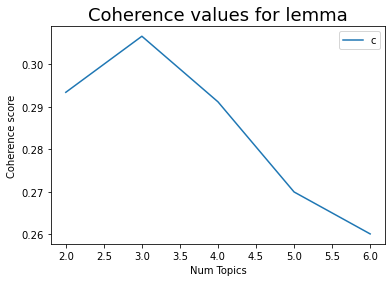

... Running lda with 3 topics
=== LDA model with 3 topics took : 0.95 minutes
Topic: 0 -> Words: 0.018*"russe" + 0.017*"ete" + 0.015*"zelensky" + 0.014*"kiev" + 0.014*"depuis" + 0.013*"arme" + 0.013*"armee" + 0.012*"apres" + 0.011*"jour" + 0.010*"civil"
Topic: 1 -> Words: 0.019*"poutine" + 0.018*"macron" + 0.013*"europe" + 0.012*"ue" + 0.012*"plus" + 0.010*"fait" + 0.010*"france" + 0.009*"otan" + 0.008*"comme" + 0.008*"etre"
Topic: 2 -> Words: 0.031*"ukrainien" + 0.019*"contre" + 0.016*"pays" + 0.013*"president" + 0.012*"france" + 0.012*"soutien" + 0.010*"militaire" + 0.009*"amp" + 0.008*"journaliste" + 0.008*"aussi"
=== Coherence Score: 0.31
... Running lda visualization
... Running dominant topics
Format topics took 1.6e+01 minutes
... Graph topics and keywords


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... Graph word cloud for each topic

 Total running time: 23.241355534394582 minutes


index  \
tweet_id                     
1488433061196812291      0   
1488447673883676672      1   
1488493240475078658      2   
1488502446771081216      3   
1488511509961527302      4   
...                    ...   
1542967067611127813  19738   
1542963887175335937  19739   
1542971236459888641  19740   
1542969041161158656  19741   
1542981780092985344  19742   

                                                                                                                                                                                                                                                                                                                                        text  \
tweet_id                                                                                                                                                                                                                                                                                                                                       
1488433061196812291                                                                                                                               voilà l'info, malheureusement très peu reprise par les #medias: \r\n2e entretien téléphonique en 4 jours entre #emmanuelmacron et #vladimirpoutine sur l'#ukraine. https://t.co/yyxetpnxuc   
1488447673883676672                                                                                                                                                                                                                                               #ukraine face à poutine ... macron hausse le ton ! https://t.co/mfpsevidlv   
1488493240475078658                                                                          crise en #ukraine : « emmanuel #macron et vladimir #poutine, se sont reparlés hier soir. il y a un dialogue et des échanges nourris. on veut éviter un conflit armé à nos portes. c'est encore possible » @gabrielattal https://t.co/v7ovwb9n4i   
1488502446771081216                           la #russie c'est l'équivalent du pib de l'italie. attention aux sanctions qu'elle pourrait recevoir et monsieur poutine est réaliste. on a loupé la relation avec la russie il y a une quinzaine d'années : elle devra être reconstruite dans l'avenir. #kiev #ukraine https://t.co/b15g66ehvl   
1488511509961527302                                                                                                                                                      crise en #ukraine : voilà pourquoi il faut sortir du piège atlantiste, refuser la guerre et quitter l’otan sur le champ ! nouvelle vidéo ➡️ https://t.co/qjyacvg9pk   
...                                                                                                                                                                                                                                                                                                                                      ...   
1542967067611127813                                                                                                                                                                                                                                    c'est magnifique et tellement émouvant 🥰🇺🇦🇪🇺 #ukraine #europe https://t.co/0ywt0zwqot   
1542963887175335937  👉 guerre un #ukraine : que faire pour aider les populations ?\r\n\r\n🗣️ @vpecresse \r\n"il y a urgence : l'hiver qui arrive. il faut mettre à l'abri les populations, reconstruire avant l'hiver [...] il faut investir massivement dans les régions libérées."\r\n\r\n📺 #le20hdedariusrochebin https://t.co/rh8jkshhcs   
1542971236459888641          👉 guerre en #ukraine : le soft power des réseaux sociaux\r\n\r\n🗣️ @vpecresse\r\n\r\n"on peut organiser le chaos à partir de ce soft power des réseaux sociaux [...] on le voit d'ailleurs car nos extrémistes sont plutôt pro russes."\r\n\r\n📺 

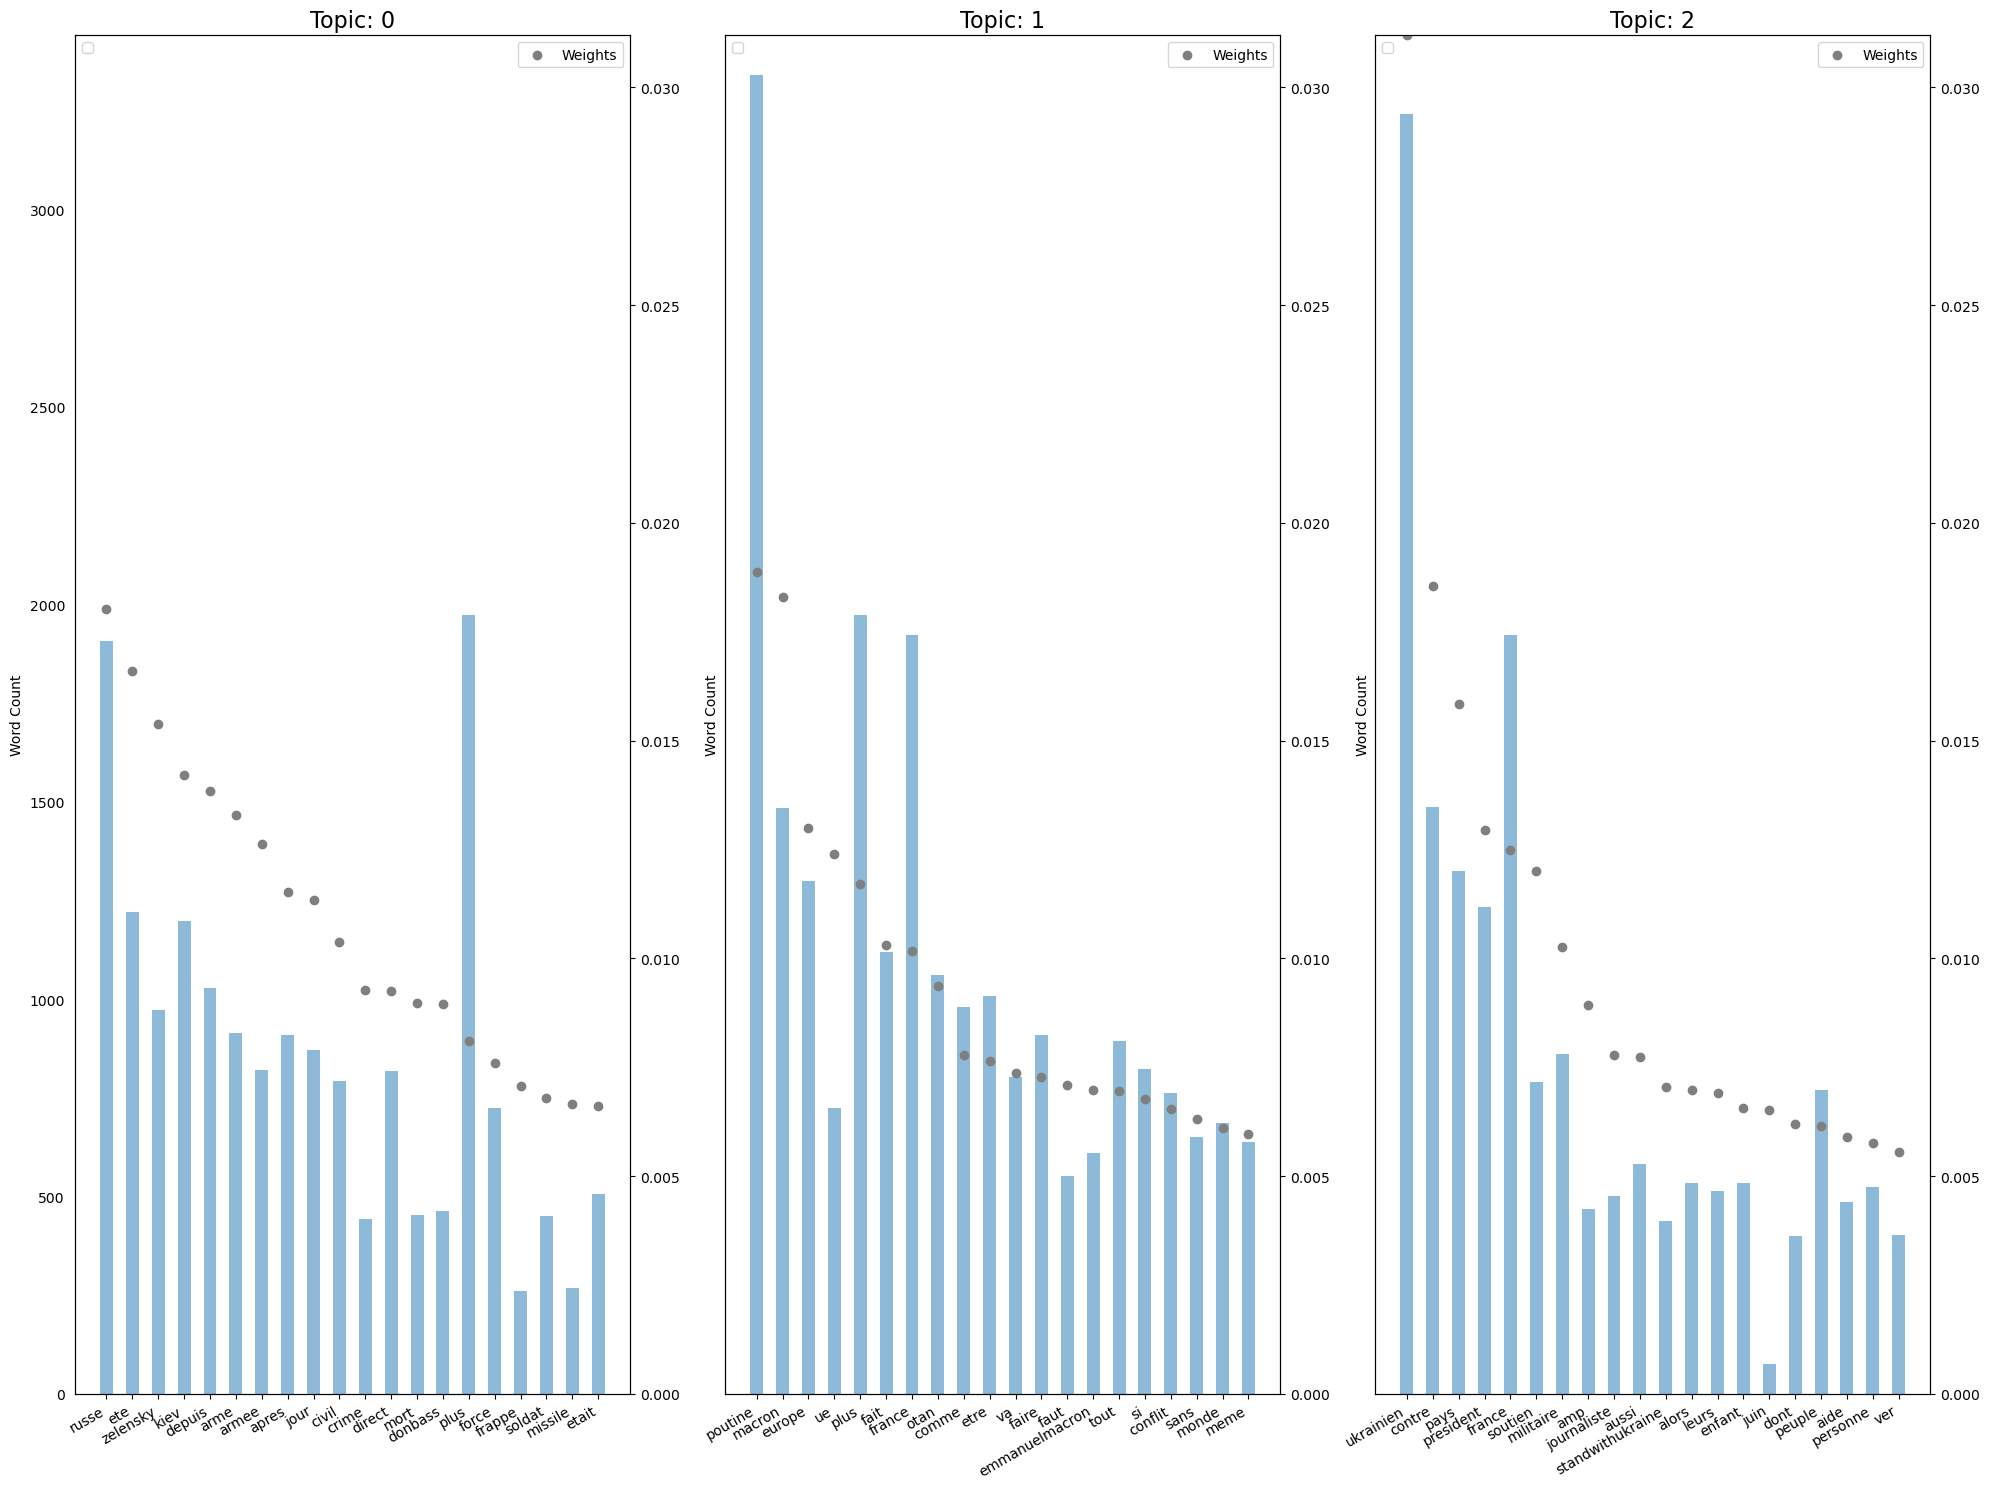

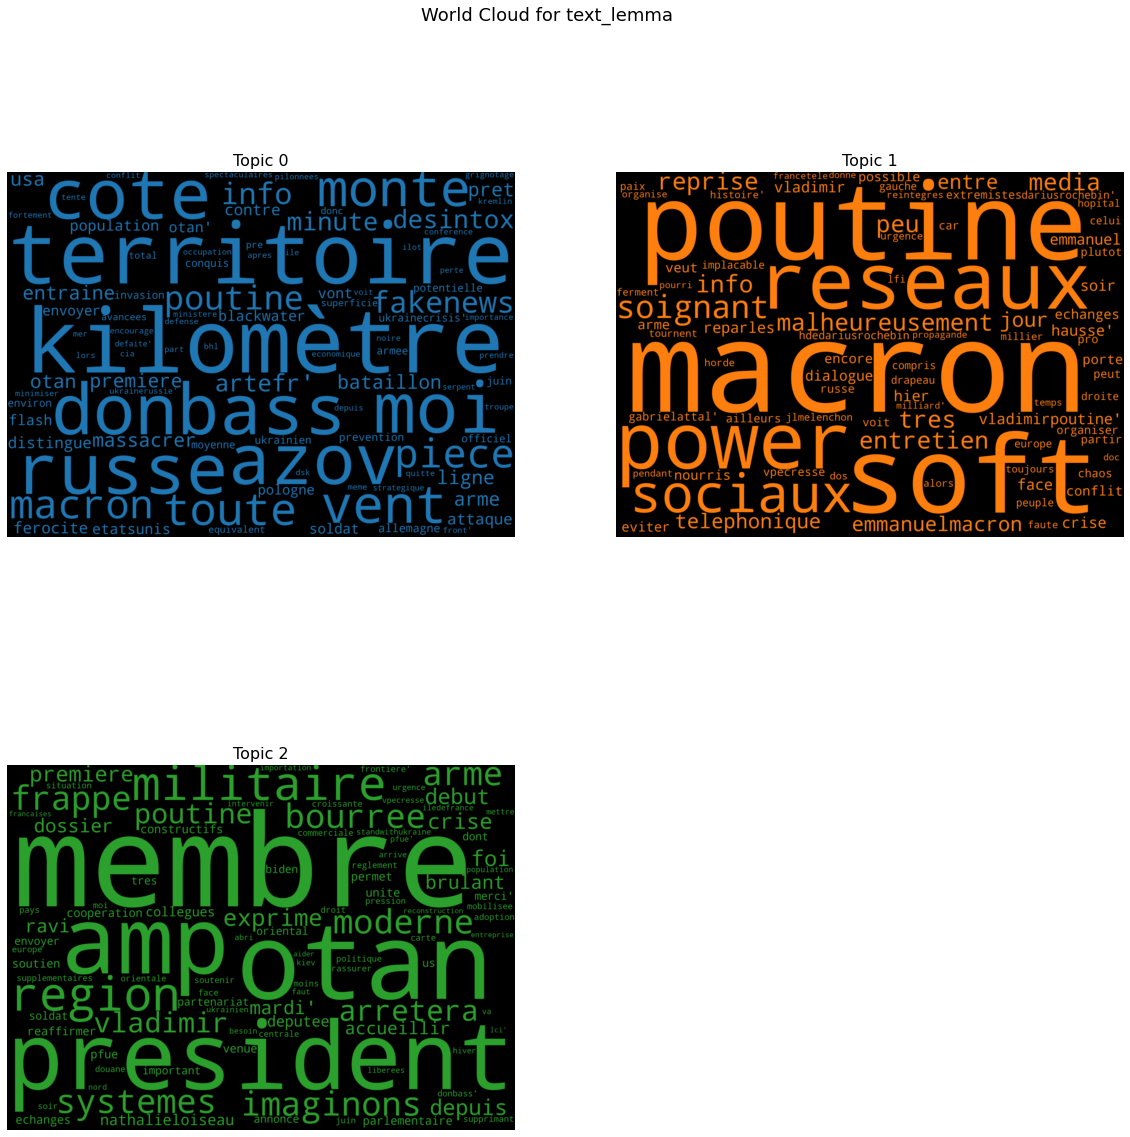

In [22]:
run_all(data.copy(deep=True), "text_lemma", "lemma", True)

In [ ]:
run_all(data.copy(deep=True), "text_lemma", "lemma", True)

### - 3 topics

In [9]:
df_lemma_3topics = pd.read_csv("~/PycharmProjects/twitter_text_mining/output/dominant_topics_lemma_3topics.csv",
                              sep=";")

In [ ]:
# plus, comme, peut, va, être, fait, alors, leurs, ver, juin, dont,soir 

In [12]:
for i in df_lemma_3topics["dominant_topic"].unique():
    display(df_lemma_3topics[df_lemma_3topics["dominant_topic"]==i].sort_values(by=["dominant_topic", "topic_perc_contrib"], ascending=[True, False]).head(20))

tweet_id  index  \
351    1492795741122744324    351   
692    1495338822493773825    692   
14338  1508751471822655499  14338   
3825   1497459630200569859   3825   
7699   1499126686331424785   7699   
1224   1496148164017106944   1224   
1391   1496434190706958337   1391   
718    1495403318180519953    718   
9697   1500773540487909378   9697   
15330  1512000121051000833  15330   
19132  1538116367827746817  19132   
667    1495220238283161600    667   
5755   1498244198922870786   5755   
3370   1497217530330497043   3370   
16831  1520815542424195072  16831   
17268  1523634806390943744  17268   
1145   1496081506573369349   1145   
7093   1498760185053163521   7093   
83     1490417228172468230     83   
699    1495359248246706181    699   

                                                                                                                                                                                                                                                                                                                                           text  \
351                                          #ukraine | « macron a offert à poutine une porte de sortie négociée à la crise. il peut refuser cette voie et choisir la guerre. nul ne pourra dire que la france n'a pas tout fait pour l'en dissuader. »\r\n\r\nexcellente analyse de @gerardaraud dans @lepoint.\r\n\r\nhttps://t.co/2xnjt5n02k   
692                                                        cette tension en #ukraine et l’impasse dans laquelle nous nous trouvons doit être attribuée à #macron qui au contraire de #sarkozy en 2008 qui a dit un #non ferme à #bush pour l’entrée de l’#ukraine dans l’#otan a eu en 2022 une attitude filandreuse et peu ferme avec les #usa   
14338  #macron disait de la #russie \r\nque le #rouble dévissait ...\r\n\r\nla réalité c'est que #poutine\r\nva imposer à l'#europe de payer\r\nson #énergie en roubles\r\n\r\nbien que ce ne soit pas encore fait,\r\nil revient à vitesse "grand v"\r\n\r\n#rothschildgate #mckinseymacrongate #praud #ggrmc #ukraine https://t.co/ja6drd5ain   
3825                                          #bfm #sia2022 mais non @c_barbier, @emmanuelmacron ne va parler aux agriculteurs parce qu'il y a la #presidentielle, en #campagne, arrêtez de lui prêter des intentions personnelles tout le temps et pour l'#ukraine vous n'avez pas trouvé ? bon pas envie de sourire 🙄 https://t.co/svi5ij0gd7   
7699                                    face à la crise, face à cette crise - plus encore que tout autre historique - l’exigence de lucidité, l’exigence de solidarité et l’exigence de responsabilité. et la volonté sans cesse réaffirmée de ne jamais céder à la facilité des temps ni de céder tout court. #ukraine https://t.co/0vydi1dp4a   
1224                            ☝🏼les militants d’#annehidalgo osent dire qu’elle est la candidate à la #presidentielle2022 la + qualifiée pr parler de la crise en #ukraine car elle reçoit des délégations étrangères ? je crève 😂👎🏻la vanité de mme #saccageparis a gagné son camp (1%). elle qui n’a rien à dire ⤵️ https://t.co/st4mtbuenw   
1391                             #macron a voulu se servir de cette crise en #ukraine pour endosser la tunique du grand pacificateur et favoriser son entrée en campagne. mais avec lui, la france est la porte-parole de l’otan ou de l’union européenne. nous n’avons plus de voix singulière et indépendante. @cnews https://t.co/yk8cpmhza3   
718                                                       @parlementpop sur l'#ukraine, on doit tenir bon sur les principes. je suis pour une france non-alignée. ni la russie ne doit entrer en ukraine, ni les usa ne doivent annexer l'ukraine dans l'otan.  \r\n\r\n#unionpopulaire \r\n\r\nhttps://t.co/ngtsqb6glf https://t.co/dbwhtohjpq   
9697                                                                             reindustrialiser la france, retrouver notre indépendance alimentaire, accroître notre indépendance énergétiq

tweet_id  index  \
9562   1500574931460968450   9562   
10837  1501971610139598861  10837   
9362   1500445543113404421   9362   
10468  1501579706495287303  10468   
9559   1500575338887274506   9559   
3312   1497205096618283008   3312   
19431  1540756943064768512  19431   
10120  1501215909163241474  10120   
18041  1530089568153788417  18041   
10471  1501579687126089730  10471   
3836   1497469584445779970   3836   
7269   1498933424274518018   7269   
2276   1496863279163088902   2276   
2987   1497122364320067585   2987   
10816  1501952388038418441  10816   
2953   1497115491898478595   2953   
13188  1505942560958816262  13188   
7471   1499033769214361601   7471   
6461   1498581782500892673   6461   
11574  1503043495665274881  11574   

                                                                                                                                                                                                                                                                                                                                       text  \
9562                                       sur le front est : zone de progression des forces russes\r\n \r\n1. donbass : les forces séparatistes ont réussi une percée dans le nord du donbass.\r\n\r\n2. kharkiv : les bombardements montent en intensité. l’encerclement de la ville est en cours par les forces russes. \r\n\r\n#ukraine   
10837                                                              🚨 interrogé par la bbc, le maire adjoint de #marioupol a affirmé que plus de 1 200 corps ont été ramassés dans les rues du port assiégé depuis le début des bombardements russes. \r\n\r\nsuivez notre direct #ukraine ➡ https://t.co/0fvxejh6ou https://t.co/hvkf0vxuwm   
9362                                              sur le front nord :\r\n➡️ kiev : la ville reste aux mains des ukrainiens. les forces russes poursuivent méthodiquement l’encerclement de la ville. les forces russes prennent positions près de bucha, irpen et gorenka, villes se situant à 20km au nord-ouest de kiev. \r\n\r\n#ukraine   
10468                                                                            ℹ️ sur le front nord :\r\n\r\n#kiev :\r\n• l’encerclement de la ville se poursuit ;\r\n• les combats se rapprochent et ont désormais lieu au niveau des villes d’irpin et de bucha (30km à l’ouest de kiev).\r\n\r\n#ukraine [6/6] https://t.co/hudlkw5xuw   
9559                                                                sur le front nord : \r\n\r\n7. kiev : l’encerclement de la ville se poursuit. les combats continuent pour le contrôle de la zone nord-ouest de l’oblast de kiev. la ligne de contact se situe désormais à une vingtaine de kilomètres au nord de kiev. \r\n\r\n#ukraine   
3312                                                                ⚡ flash - #ukraine : les troupes russes à l'approche de #kherson, ville du sud de l'ukraine et la capitale administrative de l'#oblast de kherson. #worldwar3 #ukraineinvasion #ukrainerussia #ukrainerussie #russiaukraineconflict #ukrainewar https://t.co/eqjfoxzqzx   
19431                              [a la une a 20h]\r\nla ville de #severodonetsk dans le donbass (est de l'#ukraine), théâtre de féroces combats entre les armées ukrainienne et russe depuis plusieurs semaines, est "entièrement occupée" par les forces russes, a annoncé son maire oleksandre striouk #afp 1/5 https://t.co/vqwdnrynmf   
10120                                  ℹ️sur le front nord :\r\n\r\n#soumy :\r\n• okhtyrka serait encerclée par les forces russes (75km\r\nau sud de soumy).\r\n\r\n#chernihiv :\r\n• l’armée ukrainienne est prise en tenaille dans la\r\nrégion de nizhnyn (50km au sud-est de tchernihiv).\r\n\r\n#ukraine [5/6] https://t.co/oh0jn6bhg5   
18041                                                                                                      #ukraine 27/05 au nord du saillant de kramatorsk, les forces rus ont pris lyman après l’évacuation des derniers défens

tweet_id  index  \
4321   1497623520192380937   4321   
13461  1506625683497394176  13461   
8391   1499666630732824578   8391   
6505   1498587016149282817   6505   
12443  1504216211848142853  12443   
10841  1501966777823150091  10841   
2941   1497117402953392129   2941   
4093   1497544894444941314   4093   
7452   1499019352741498883   7452   
9392   1500456872972849156   9392   
4593   1497761964579246081   4593   
13934  1507402020516515841  13934   
6063   1498344812625465346   6063   
11379  1502733364381552644  11379   
8093   1499419591881207808   8093   
11587  1503051361465872397  11587   
7445   1499006814242938889   7445   
10367  1501501322117492737  10367   
12156  1503816255500959745  12156   
17063  1522278218669117441  17063   

                                                                                                                                                                                                                                                                                                                                   text  \
4321                                                                 #solidarité | 3 des 7 associations sapeurs-#pompiers signataires de la charte de la fédération nationale des sapeurs-#pompiers de france, lancent une opération de solidarité pour venir en aide au peuple ukrainien. #solidarité #ukraine https://t.co/hux6e7tfor   
13461         #ukraine🇺🇦 | nous saluons le nouveau paquet d’actions en aide aux réfugiés. accueil, éducation, emploi, logement: l’🇪🇺 concrétise les droits des réfugiés prévus par la directive sur la protection temporaire.\r\n\r\nnotre communiqué @reneweurope @sophieintveld\r\n👉🏻 https://t.co/ogbwphupnm https://t.co/aafxss3jbi   
8391                  #ukraine 🇺🇦\r\nnous organisons des collectes solidaires à @paris.\r\n\r\n📍à #paris12, une collecte de produits de première nécessité se tient à la @maisonassos12\r\n👉 du lundi au jeudi de 8h30 à 17h\r\n👉 ce samedi et dimanche de 9h à 17h.\r\n#standwithukraine️ #ukraine #solidarite https://t.co/w8eyjspk7o   
6505                         🇺🇦 aide d’urgence en faveur de l’#ukraine\r\n🇫🇷 à l'appel de @l_amf \r\n📦 collectes de dons et initiatives solidaires dans les communes du territoire dont #lorient, #calan, #hennebont, #inzinzaclochrist, #lanester &amp; #ploemeur\r\n🙏 renseignez-vous auprès de votre commune https://t.co/lazv2hop9u   
12443                                         #ukraine afin d'accompagner l'élan de générosité des français qui souhaitent aider les personnes déplacées et réfugiées en #france, le gouvernement 🇨🇵 a créé la plateforme "je m'engage pour l'ukraine" 👉 https://t.co/xpymtbsat6\r\n\r\n💙💛 #standwithukraine 🇺🇦 https://t.co/dtu4u8oipx   
10841                                                         #ukraine🇺🇦| @marleneschiappa est venue observer à la gare de l'est le dispositif de protection temporaire mis en place pour les déplacés ukrainiens. l'objectif ? leur permettre de : \r\n👉 rester sur le sol 🇫🇷\r\n👉 bénéficier d'une protection \r\n👉circuler dans l'🇪🇺   
2941                                                                    j'appelle les citoyennes et citoyens à manifester leur soutien au peuple ukrainien en participant au rassemblement samedi à 15h place kleber.\r\nen solidarité, #strasbourg aux couleurs du drapeau de l' #ukraine.\r\n#standwithukrain https://t.co/s2fngqs3w0   
4093                                           #ukraine : puisque le conseil de sécurité est paralysé par le veto de la #russie, @amnesty demande que l’ag des nations unies se réunisse et adopte une résolution condamnant l’attaque russe et exigeant la fin des violations des droits humains et du droit international humanitaire   
7452     #ukraine | en 🇫🇷 des ong reconnues par la #fnspf oeuvrent pour les populations en difficultés. \r\nen 6j, c’est + de 660 000 réfugiés 🇺🇦 qui ont fui leur pays en guerre.\r\n\r\nvous souhaitez contribuer à l’aide internationale ? \r\nnotre collecte des 

## Lemma bigrame

===== Method : lemma_bigrame =====
... Running bag of words
... Running search for best nb of topics
=== LDA model with 2 topics took : 1.6 minutes
Topic: 0 -> Words: 0.022*"emmanuel_macron" + 0.019*"union_europeenne" + 0.017*"vladimir_poutine" + 0.016*"point_situation" + 0.013*"depuis_debut" + 0.013*"volodymyr_zelensky" + 0.012*"mieux_comprendre" + 0.012*"retrouvez_toutes" + 0.012*"toutes_information" + 0.011*"comprendre_enjeu"
Topic: 1 -> Words: 0.012*"statut_candidat" + 0.010*"peuple_ukrainien" + 0.008*"centre_commercial" + 0.008*"armee_ukrainien" + 0.008*"accord_minsk" + 0.007*"doit_etre" + 0.007*"force_russe" + 0.007*"leclerc_imhoff" + 0.007*"frederic_leclerc" + 0.007*"reseaux_sociaux"
=== Coherence Score: 0.6
=== LDA model with 3 topics took : 1.7 minutes
Topic: 0 -> Words: 0.028*"emmanuel_macron" + 0.022*"vladimir_poutine" + 0.021*"point_situation" + 0.017*"depuis_debut" + 0.017*"volodymyr_zelensky" + 0.016*"mieux_comprendre" + 0.016*"retrouvez_toutes" + 0.016*"toutes_informatio

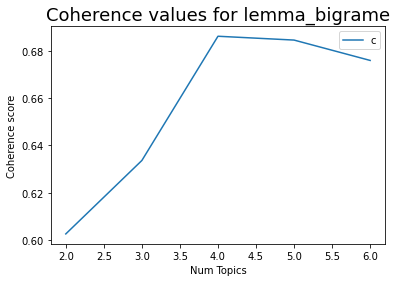

... Running lda with 4 topics
=== LDA model with 4 topics took : 1.7 minutes
Topic: 0 -> Words: 0.044*"emmanuel_macron" + 0.035*"vladimir_poutine" + 0.019*"carte_situation" + 0.019*"situation_militaire" + 0.018*"militaire_juin" + 0.017*"juin_soir" + 0.017*"soir_donbass" + 0.017*"etats_uni" + 0.015*"canon_caesar" + 0.014*"faut_mettre"
Topic: 1 -> Words: 0.019*"armee_ukrainien" + 0.018*"affaire_etrangeres" + 0.018*"leclerc_imhoff" + 0.018*"frederic_leclerc" + 0.017*"doit_etre" + 0.017*"force_russe" + 0.013*"chaque_jour" + 0.011*"journaliste_francais" + 0.011*"pro_poutine" + 0.011*"ete_tue"
Topic: 2 -> Words: 0.028*"point_situation" + 0.023*"depuis_debut" + 0.022*"mieux_comprendre" + 0.021*"retrouvez_toutes" + 0.021*"toutes_information" + 0.021*"comprendre_enjeu" + 0.021*"enjeu_crise" + 0.021*"information_mieux" + 0.021*"crise_notredefense" + 0.021*"armeedeterre_armee"
Topic: 3 -> Words: 0.037*"statut_candidat" + 0.035*"union_europeenne" + 0.025*"centre_commercial" + 0.023*"volodymyr_zele

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... Graph word cloud for each topic

 Total running time: 31.58217315276464 minutes


index  \
tweet_id                     
1488433061196812291      0   
1488447673883676672      1   
1488493240475078658      2   
1488502446771081216      3   
1488511509961527302      4   
...                    ...   
1542967067611127813  19738   
1542963887175335937  19739   
1542971236459888641  19740   
1542969041161158656  19741   
1542981780092985344  19742   

                                                                                                                                                                                                                                                                                                                                        text  \
tweet_id                                                                                                                                                                                                                                                                                                                                       
1488433061196812291                                                                                                                               voilà l'info, malheureusement très peu reprise par les #medias: \r\n2e entretien téléphonique en 4 jours entre #emmanuelmacron et #vladimirpoutine sur l'#ukraine. https://t.co/yyxetpnxuc   
1488447673883676672                                                                                                                                                                                                                                               #ukraine face à poutine ... macron hausse le ton ! https://t.co/mfpsevidlv   
1488493240475078658                                                                          crise en #ukraine : « emmanuel #macron et vladimir #poutine, se sont reparlés hier soir. il y a un dialogue et des échanges nourris. on veut éviter un conflit armé à nos portes. c'est encore possible » @gabrielattal https://t.co/v7ovwb9n4i   
1488502446771081216                           la #russie c'est l'équivalent du pib de l'italie. attention aux sanctions qu'elle pourrait recevoir et monsieur poutine est réaliste. on a loupé la relation avec la russie il y a une quinzaine d'années : elle devra être reconstruite dans l'avenir. #kiev #ukraine https://t.co/b15g66ehvl   
1488511509961527302                                                                                                                                                      crise en #ukraine : voilà pourquoi il faut sortir du piège atlantiste, refuser la guerre et quitter l’otan sur le champ ! nouvelle vidéo ➡️ https://t.co/qjyacvg9pk   
...                                                                                                                                                                                                                                                                                                                                      ...   
1542967067611127813                                                                                                                                                                                                                                    c'est magnifique et tellement émouvant 🥰🇺🇦🇪🇺 #ukraine #europe https://t.co/0ywt0zwqot   
1542963887175335937  👉 guerre un #ukraine : que faire pour aider les populations ?\r\n\r\n🗣️ @vpecresse \r\n"il y a urgence : l'hiver qui arrive. il faut mettre à l'abri les populations, reconstruire avant l'hiver [...] il faut investir massivement dans les régions libérées."\r\n\r\n📺 #le20hdedariusrochebin https://t.co/rh8jkshhcs   
1542971236459888641          👉 guerre en #ukraine : le soft power des réseaux sociaux\r\n\r\n🗣️ @vpecresse\r\n\r\n"on peut organiser le chaos à partir de ce soft power des réseaux sociaux [...] on le voit d'ailleurs car nos extrémistes sont plutôt pro russes."\r\n\r\n📺 

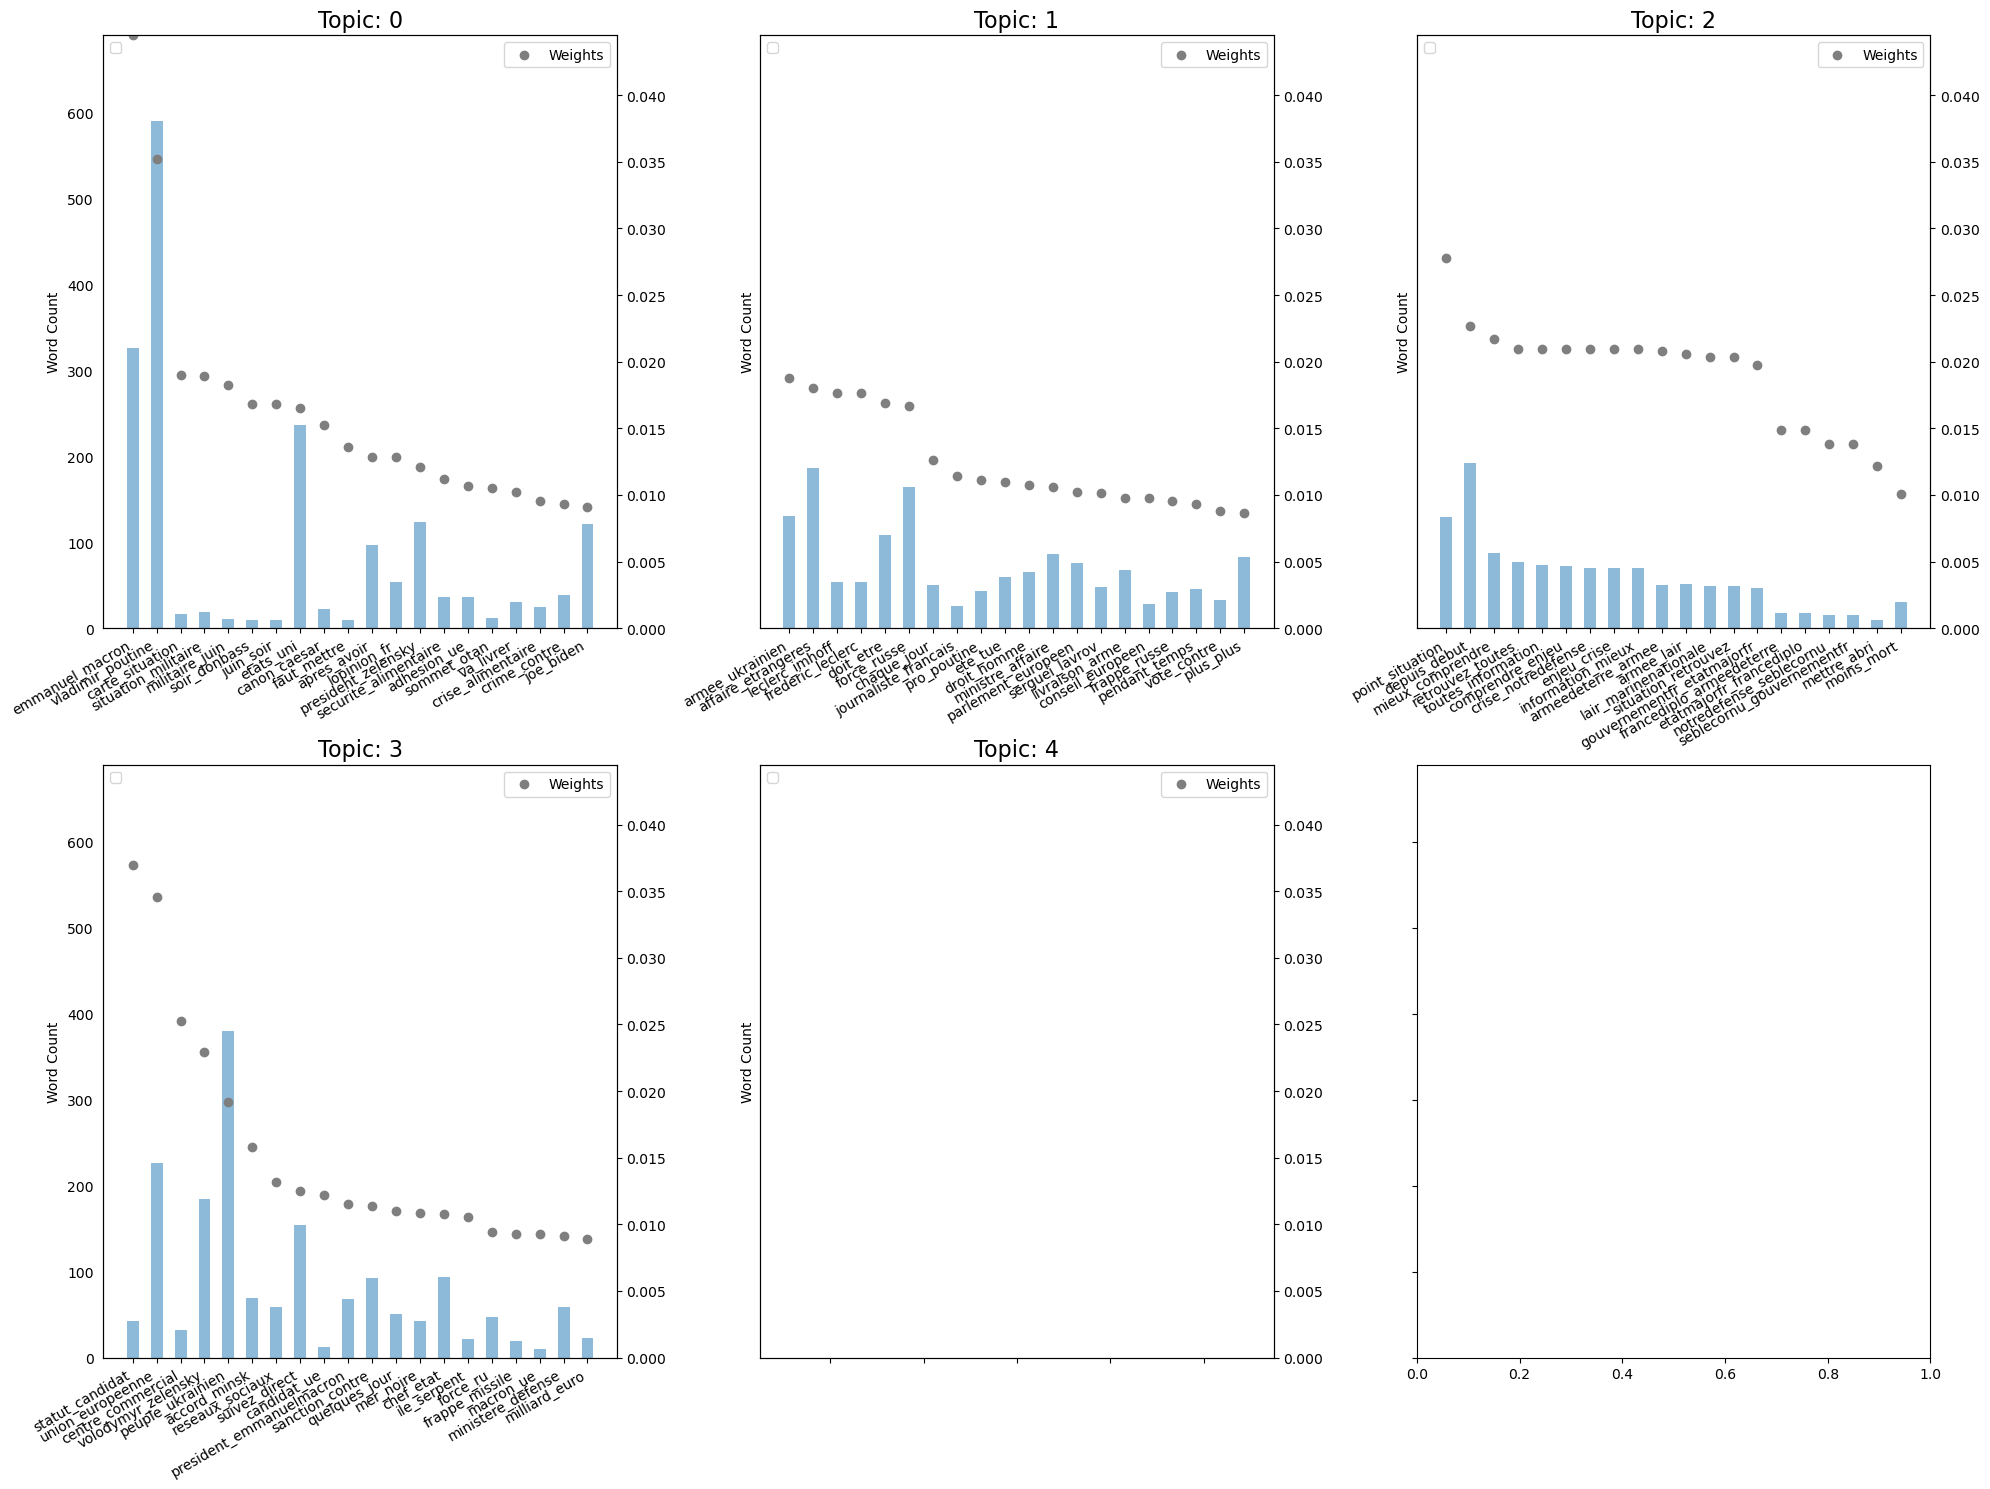

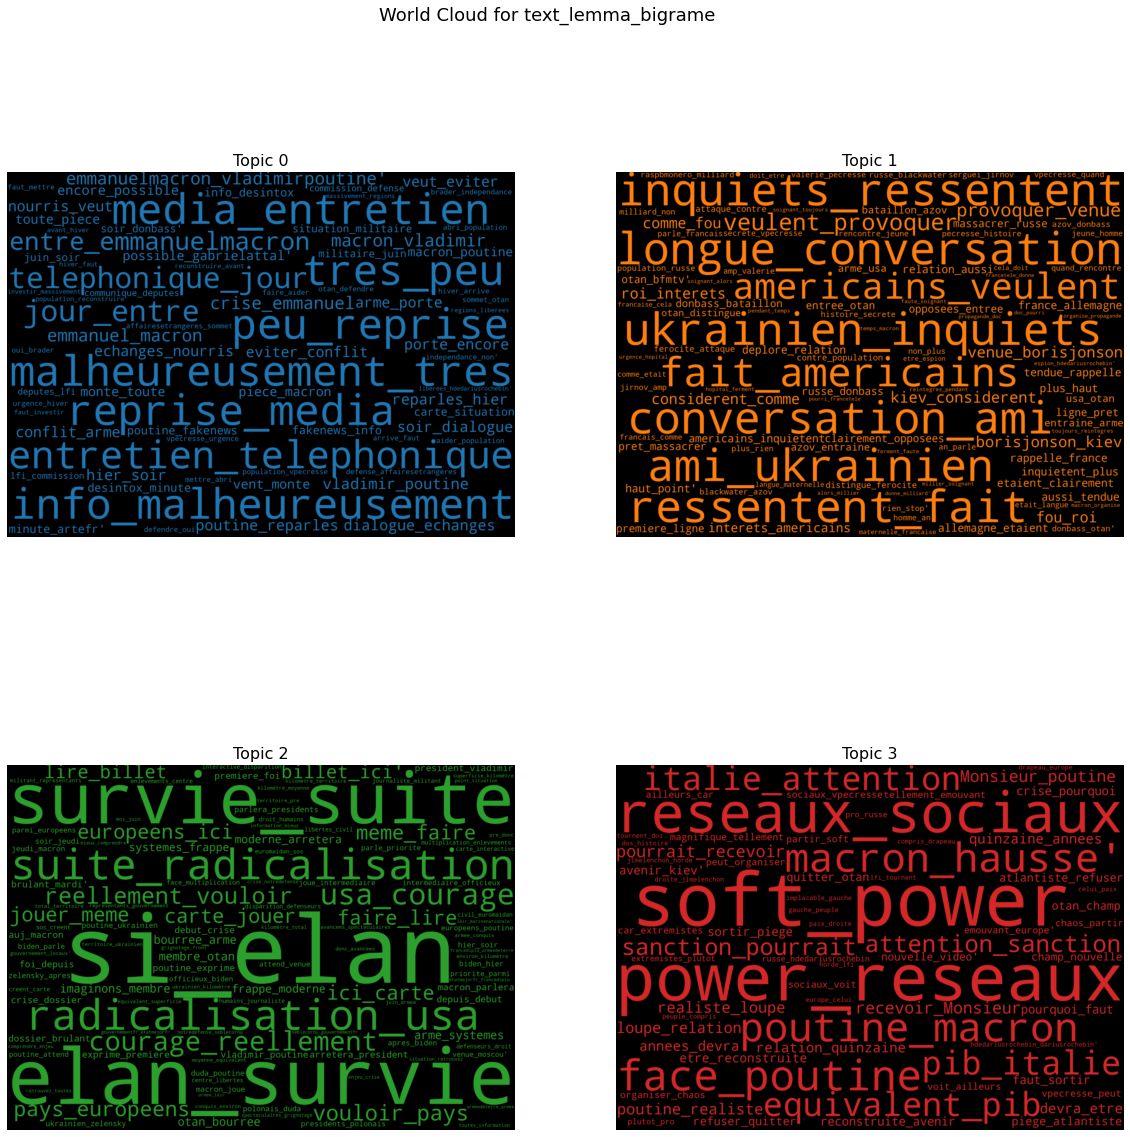

In [23]:
#run_all(data.copy(deep=True), "text_lemma_bigrame", "lemma_bigrame", True)


In [13]:
df_lemma_bigrame_4topics = pd.read_csv("~/PycharmProjects/twitter_text_mining/output/dominant_topics_lemma_bigrame_4topics.csv",
                              sep=";")

# lopinion_fr, faut_mettre, apres_avoir, reseaux_sociaux, suivez_direct, peut etre, peut dire, armees_gouv, doit être, chaque_jour, plus_plus, point_situation, depuis_debut

In [48]:
for i in df_lemma_bigrame_4topics["dominant_topic"].unique():
    display(df_lemma_bigrame_4topics[df_lemma_bigrame_4topics["dominant_topic"]==i].sort_values(by=["dominant_topic", "topic_perc_contrib"], ascending=[True, False]).head(50))

tweet_id  index  \
10737  1501883327816552450  10749   
5473   1498098464739184644   5479   
14320  1508743133391114244  14336   
9344   1500434648542896128   9354   
4160   1497557158673756167   4163   
16283  1517180195005943811  16300   
16285  1517203205649805314  16302   
257    1492214131281350660    257   
2      1488493240475078658      2   
7760   1499227429235265537   7767   
11679  1503270704103542784  11693   
16949  1521757842549755905  16966   
8016   1499377968883408897   8025   
4190   1497577123330076682   4193   
19190  1538904015311970305  19208   
19240  1539268473427316736  19258   
19260  1539551419845554176  19278   
19312  1540003986702467074  19330   
19366  1540316203171856384  19384   
19393  1540639393760874498  19411   
19433  1541015027167252480  19451   
19609  1542101308815065089  19627   
19651  1542462081781358597  19669   
19702  1542820172486119425  19720   
11312  1502681478437687306  11326   
15637  1513232353610579976  15654   
279    1492251841169698825    279   
11044  1502300882775519241  11056   
18877  1537347349747744768  18895   
2593   1496927727852662792   2594   
72     1490389133918887940     72   
7765   1499258893108719617   7772   
16691  1520070571995938816  16708   
2742   1496956016642174976   2743   
9230   1500359211162779651   9240   
11543  1503021399790788612  11557   
12338  1504143356506562561  12352   
12683  1504788694921850892  12697   
13637  1506907140748890118  13653   
16832  1520988459032264706  16849   
17281  1523765714414620672  17298   
17770  1527326398745960453  17787   
6547   1498600877279649793   6553   
8031   1499387936667754496   8040   
12728  1504868224860663811  12742   
18083  1530542716198723586  18101   
5790   1498263731956031489   5796   
8654   1499810253600350209   8663   
15000  1511051951689150469  15016   
1197   1496117114763194379   1197   

                                                                                                                                                                                                                                                                                                                               text  \
10737                                                                                                         🔴 emmanuel #macron et le chancelier allemand olaf #scholz se sont entretenus ce matin avec vladimir #poutine pour « exiger de la russie qu’elle cesse immédiatement le feu » en #ukraine annonce l’elysée @franceinfo   
5473                                              [ 🇺🇦#ukraine / 🇷🇺#russie ]\r\n\r\nla corée du nord affirme que les états-unis sont responsables de la guerre en ukraine. elle dénonce un "deux poids, deux mesures" des états-unis à l'égard du reste du monde \r\n\r\n#ukrainerussiawar #vladimirpoutine https://t.co/9t5cn9uzub   
14320                                                                                                                                                                                                    🔴 appel téléphonique entre emmanuel #macron et vladimir #poutine aujourd'hui à 16h30 annonce l'élysée #ukraine @franceinfo   
9344                                                                                                                                                                                                              🔴 l’entretien téléphonique entre emmanuel #macron et vladimir #poutine vient de débuter annonce l’élysée #ukraine   
4160                                                                        les etats-unis vont fournir une nouvelle aide militaire à l'#ukraine, d'un montant de 350 millions de dollars, pour aider #kiev à combattre l'invasion russe, a annoncé le chef de la diplomatie américaine antony blinken #afp https://t.co/yo8saaeqm9   
16283                                                     joe biden annonce une nouvelle aide militaire de 800 millions de dollars pour l'ukraine\r\n\r\ncette enveloppe

tweet_id  index  \
9359   1500443992105881600   9369   
9552   1500574759628812291   9563   
9850   1500883613688250369   9861   
10113  1501215883133399043  10124   
10460  1501579682852093954  10472   
10809  1501952361362702343  10821   
11103  1502347419601838082  11115   
11564  1503043471963209741  11578   
11818  1503417516093329414  11832   
12135  1503808908611227650  12149   
12321  1504128044902006788  12335   
12572  1504504634320338945  12586   
12716  1504861575890485256  12730   
13104  1505829340101152768  13119   
13161  1505917384548397062  13176   
13323  1506277585680015361  13338   
13755  1507040679490424838  13771   
13897  1507376614602153988  13913   
14249  1508440792678944775  14265   
14351  1508809826423517185  14367   
6942   1498704887022039047   6948   
13686  1506952613572579332  13702   
6600   1498628149546037251   6606   
5147   1497976305073152005   5152   
14808  1510624080323559433  14824   
6660   1498630709594017797   6666   
1491   1496687001202044930   1491   
3323   1497215710094835742   3324   
5212   1497992913283952658   5218   
595    1494987374354485250    595   
2314   1496870617865359365   2314   
9985   1501096695064666112   9996   
15864  1514553457147006982  15881   
7921   1499336184773939201   7928   
18910  1537398045641527298  18928   
8541   1499739978074632196   8550   
2258   1496867548293382147   2258   
8384   1499666536327491586   8393   
6751   1498662758891634691   6757   
4278   1497607626024226823   4281   
1506   1496691435772518407   1506   
14893  1510846365894680576  14909   
18914  1537407546910248962  18932   
14941  1510928844441718786  14957   
15918  1514834881808846851  15935   
1811   1496764589668978697   1811   
19327  1540048434849353731  19345   
1164   1496092720087154689   1164   
2354   1496878408638341125   2354   
3820   1497460862734450689   3823   

                                                                                                                                                                                                                                                                                                                                               text  \
9359                                                                                                                                     l’offensive des forces armées russes se poursuit sur l’ensemble du territoire de l’ #ukraine. \r\n \r\nℹ️ situation au 5 mars 2022 → https://t.co/5bvhkwwguf \r\n \r\n@armees_gouv https://t.co/xklhuwzezv   
9552                                                                                                                                       l’offensive des forces armées russes se poursuit sur l’ensemble du territoire de l’ #ukraine. \r\n\r\nℹ️ situation au 6 mars 2022 → https://t.co/5bvhkwwguf \r\n\r\n@armees_gouv https://t.co/dwz0n7noyg   
9850                                                                                                                                         l’offensive des forces armées russes se poursuit sur l’ensemble du territoire de l'#ukraine. \r\n\r\nℹ️ situation au 7 mars 2022 → https://t.co/5bvhkwwguf\r\n\r\n@armees_gouv https://t.co/l9scu0tmrb   
10113                                                                                                                          l’offensive des forces armées russes se poursuit sur l’ensemble du territoire de l'#ukraine. \r\n\r\nℹ️ situation au 8 mars 2022 → https://t.co/5bvhkwwguf\r\n\r\n@armees_gouv \r\n\r\n[1/6] https://t.co/wwjj8xsz53   
10460                                                                                                                          l’offensive des forces armées russes se poursuit sur l’ensemble du territoire de l'#ukraine. \r\n\r\nℹ️ situation au 9 mars 2022 → https://t.co/5bvhkwwguf\r\n\r\n@armees_gouv \r\n\r\n[1/6] https://t.co/xrhf0apaad   
10809                                                                   

tweet_id  index  \
14099  1507978261946638338  14115   
3517   1497268201087979526   3518   
7945   1499339381064273920   7952   
14144  1508079938993336325  14160   
8462   1499707901715394568   8471   
14464  1509203811109416973  14480   
13080  1505801594012676098  13095   
6769   1498659914339733508   6775   
17477  1525115507204145153  17494   
2015   1496814348882391042   2015   
10849  1501981209798262785  10861   
11361  1502721084566618112  11375   
11685  1503264917327159297  11699   
13698  1506971596153622531  13714   
13929  1507422562971643904  13945   
14338  1508778497573113857  14354   
14427  1509100621193900032  14443   
16172  1516463784046612489  16189   
9761   1500819140512206854   9772   
14131  1508037677366620164  14147   
7903   1499329399635820546   7910   
14617  1509820600025595929  14633   
7906   1499328810226962435   7913   
14161  1508121520333275142  14177   
16417  1518243476231630848  16434   
18276  1531695351631167489  18294   
18316  1532020853843574785  18334   
16684  1520036757068206080  16701   
1281   1496203117230280708   1281   
6110   1498361247712043011   6116   
2619   1496937458839207944   2620   
15508  1512714869077909507  15525   
1745   1496761686753423363   1745   
18221  1531349349078388737  18239   
2406   1496897400308649985   2406   
18182  1531286266062438403  18200   
18231  1531389203728281601  18249   
9521   1500550618833956867   9531   
4423   1497651725322366976   4427   
8253   1499547971930800130   8262   
6255   1498405217016201218   6261   
17628  1526090557063319552  17645   
10699  1501866704061620228  10711   
18213  1531313308283854850  18231   
1735   1496763840633180162   1735   
1454   1496560495658082304   1454   
15275  1511878629256531968  15291   
16850  1521059517785649152  16867   
16896  1521385862612848640  16913   
18113  1530878130960973824  18131   

                                                                                                                                                                                                                                                                                                                                 text  \
14099                 aujourd’hui, rassemblement à #paris 17h30, place de la république, pour l’#ukraine, les #ukrainiennes et #ukrainiens ! et toutes celles et ceux qui souffrent de la #guerre de #poutine ! ✊https://t.co/doymwjjcuz #standwithukraine #ukraine 🇺🇦#stopputinnow #stoprussia @ukrainestand https://t.co/4btqkzxlp4   
3517   alors que l'agression de #poutine contre l'#ukraine tue &amp; que le peuple résiste avec bravoure à kiev &amp; ailleurs, rdv samedi à 15h, place de la république à paris.\r\npour dire notre soutien aux ukrainiens et notre indignation devant l'agression en cours.\r\n#standwithukraine #stopputin https://t.co/xbzrxgqpgt   
7945                        🇫🇷🇷🇺☣️😨"ce n'est pas nous qui commençons à parler de guerre nucléaire, c'est votre ministre jean-yves le drian", accuse le ministre russe des affaires étrangères sergueï lavrov, interrogé par @dariusrochebin, en direct, sur #lci @tf1info #ukrainerussiawar #ukraine #poutine https://t.co/vomduckc6g   
14144                                                                                                                                rdv tout à l’heure à 17h30, place de la #république à #paris ! 💙💛#standwithukraine #ukraine #stopputinnow #stoprussia #stoprussianaggression 🇺🇦✊🌻https://t.co/tzi7d3g2sb https://t.co/gene8u4yzc   
8462                                                        le conseil des droits de l'homme de l'onu a décidé d'établir d'urgence une commission d'enquête internationale indépendante suite à l'agression de la #russie contre l'#ukraine.\r\n\r\nvote\r\n✅ pour : 32\r\n❌ contre : 2\r\n➖ abstentions : 13 https://t.co/r4yftsayus   
14464                                                                                                                                 rdv samedi 2 avril, pl

tweet_id  index  \
15619  1513137392588361746  15636   
15676  1513529143685795843  15693   
15788  1514240024811905027  15805   
15874  1514582503650213888  15891   
16011  1515370469674958864  16028   
16054  1515748331099770881  16071   
16096  1516102618535366659  16113   
16157  1516404097100001281  16174   
16276  1517156592327688192  16293   
16317  1517497051063496704  16334   
16378  1517921501030322176  16395   
16443  1518569662602256386  16460   
16499  1518933217373564931  16516   
16581  1519367842013093888  16598   
16614  1519648583263428608  16631   
16685  1520044173210144769  16702   
16752  1520411341919559680  16769   
16817  1520819033746161665  16834   
16922  1521510114376695809  16939   
16961  1521789817926868994  16978   
17086  1522601697587220480  17103   
17127  1522940274208509953  17144   
17173  1523249170936905733  17190   
17257  1523663029266968576  17274   
17309  1523958986449592321  17326   
17385  1524414482361077760  17402   
17430  1524760374964363265  17447   
17476  1525108443077562368  17493   
17828  1527972948358873093  17845   
17862  1528396937698979841  17880   
17894  1528737934676873217  17912   
17934  1529071104589012992  17952   
17967  1529451688796504065  17985   
18245  1531534511867060227  18263   
18313  1531981941557297153  18331   
18388  1532692553010663426  18406   
18510  1533893605496180736  18528   
18640  1535250988638126083  18658   
19069  1537816592263700487  19087   
19194  1538907598208086016  19212   
19553  1541710903531413504  19571   
19618  1542149344056545280  19636   
19708  1542842180091478016  19726   
14979  1511029618718957568  14995   
15923  1514842860398551040  15940   
15943  1514949800084619265  15960   
16546  1519192171710193665  16563   
16774  1520650539318525952  16791   
18901  1537387819261382656  18919   
17649  1526205272099799042  17666   

                                                                                                                                                                                                                                                                                                                            text  \
15619                          📍point de situation en #ukraine au 10/04/2022.\r\nretrouvez toutes les informations pour mieux comprendre les enjeux de cette crise⤵️\r\nhttps://t.co/pxnd7xlsgm\r\n#notredéfense \r\n@florence_parly @hervegrandjean @gouvernementfr  @etatmajorfr @armeedeterre @armee_de_lair @marinenationale   
15676                         📍point de situation en #ukraine au 11/04/2022.\r\nretrouvez toutes les informations pour mieux comprendre les enjeux de cette crise ⤵️\r\nhttps://t.co/pxnd7xlsgm\r\n#notredéfense \r\n@florence_parly @hervegrandjean @gouvernementfr  @etatmajorfr @armeedeterre @armee_de_lair @marinenationale   
15788                            📍point de situation en #ukraine au 13/04/2022.\r\nretrouvez toutes les informations pour mieux comprendre les enjeux de cette crise⤵️\r\nhttps://t.co/pxnd7xlsgm\r\n#notredéfense\r\n@florence_parly @hervegrandjean @gouvernementfr @etatmajorfr @armeedeterre @armee_de_lair @marinenationale   
15874                          📍point de situation en #ukraine au 14/04/2022.\r\nretrouvez toutes les informations pour mieux comprendre les enjeux de cette crise⤵️\r\nhttps://t.co/pxnd7xlsgm\r\n#notredéfense \r\n@florence_parly @hervegrandjean @gouvernementfr  @etatmajorfr @armeedeterre @armee_de_lair @marinenationale   
16011                         📍point de situation en #ukraine au 16/04/2022.\r\nretrouvez toutes les informations pour mieux comprendre les enjeux de cette crise. ⤵️\r\nhttps://t.co/pxnd7xlsgm\r\n#notredéfense\r\n@florence_parly @hervegrandjean @gouvernementfr  @etatmajorfr @armeedeterre @armee_de_lair @marinenationale   
16054                         📍point de situation en #ukraine au 17/04/2022.\r\nretrouvez toutes les informations pour mieux comprendre les enjeux de cette crise ⤵️\r\nhttps://t.co/pxnd7

In [43]:
sort_df_lemma_bigrame_4topics = df_lemma_bigrame_4topics.sort_values(by=["dominant_topic", "topic_perc_contrib"], ascending=[True, False])
sort_df_lemma_bigrame_4topics["seq"] = sort_df_lemma_bigrame_4topics.groupby(["dominant_topic"]).cumcount() + 1
sort_df_lemma_bigrame_4topics = sort_df_lemma_bigrame_4topics[sort_df_lemma_bigrame_4topics["seq"] <= 50]
_users = sort_df_lemma_bigrame_4topics.groupby(["dominant_topic", "username"])["tweet_id"].nunique()
_users = _users.reset_index()

In [44]:
sort_df_lemma_bigrame_4topics.head()

tweet_id  index  \
10737  1501883327816552450  10749   
5473   1498098464739184644   5479   
14320  1508743133391114244  14336   
9344   1500434648542896128   9354   
4160   1497557158673756167   4163   

                                                                                                                                                                                                                                                                                    text  \
10737                                                              🔴 emmanuel #macron et le chancelier allemand olaf #scholz se sont entretenus ce matin avec vladimir #poutine pour « exiger de la russie qu’elle cesse immédiatement le feu » en #ukraine annonce l’elysée @franceinfo   
5473   [ 🇺🇦#ukraine / 🇷🇺#russie ]\r\n\r\nla corée du nord affirme que les états-unis sont responsables de la guerre en ukraine. elle dénonce un "deux poids, deux mesures" des états-unis à l'égard du reste du monde \r\n\r\n#ukrainerussiawar #vladimirpoutine https://t.co/9t5cn9uzub   
14320                                                                                                                                                         🔴 appel téléphonique entre emmanuel #macron et vladimir #poutine aujourd'hui à 16h30 annonce l'élysée #ukraine @franceinfo   
9344                                                                                                                                                                   🔴 l’entretien téléphonique entre emmanuel #macron et vladimir #poutine vient de débuter annonce l’élysée #ukraine   
4160                             les etats-unis vont fournir une nouvelle aide militaire à l'#ukraine, d'un montant de 350 millions de dollars, pour aider #kiev à combattre l'invasion russe, a annoncé le chef de la diplomatie américaine antony blinken #afp https://t.co/yo8saaeqm9   

             username  \
10737  GuillaumeDaret   
5473    Le_Millenaire   
14320  GuillaumeDaret   
9344   GuillaumeDaret   
4160            afpfr   

                                                                                                                                                                                                                                                                                              text_lemma_bigrame  \
10737                                            emmanuel_macron macron_chancelier chancelier_allemand allemand_olaf olaf_scholz scholz_entretenu entretenu_matin matin_vladimir vladimir_poutine poutine_exiger exiger_cesse cesse_immediatement immediatement_feu feu_annonce annonce_elysee elysee_franceinfo   
5473                                                         coree_nord nord_affirme affirme_etats etats_uni uni_responsable responsable_denonce denonce_deux deux_poids poids_deux deux_mesure mesure_etats etats_uni uni_egard egard_reste reste_monde monde_ukrainerussiawar ukrainerussiawar_vladimirpoutine   
14320                                                                                                                                                     appel_telephonique telephonique_entre entre_emmanuel emmanuel_macron macron_vladimir vladimir_poutine poutine_annonce annonce_elysee elysee_franceinfo   
9344                                                                                                                                        entretien_telephonique telephonique_entre entre_emmanuel emmanuel_macron macron_vladimir vladimir_poutine poutine_vient vient_debuter debuter_annonce annonce_elysee   
4160   etats_uni uni_vont vont_fournir fournir_nouvelle nouvelle_aide aide_militaire militaire_montant montant_million million_dollar dollar_aider aider_kiev kiev_combattre combattre_invasion invasion_annonce annonce_chef chef_diplomatie diplomatie_americaine americaine_antony antony_blinken blinken_afp   

       document_no  dominant_topic  topic_perc_contrib  \
10737        10737              

In [45]:
_users = df_lemma_bigrame_4topics.groupby(["dominant_topic", "username"])["tweet_id"].nunique()
_users = _users.reset_index()
_users = _users.sort_values(by=["dominant_topic", "tweet_id"], ascending=[True, False])
_users["seq"] = _users.groupby(["dominant_topic"]).cumcount() + 1
_users = _users[_users["seq"]<=20]
#_users.drop_duplicates("dominant_topic")

In [46]:
import plotly.express as px

fig = px.bar(_users, x="dominant_topic", y="tweet_id", color="username", title="top 20 contributions to the topics")
fig.show()

## Lemma trigrame 

===== Method : lemma_trigrame =====
... Running bag of words
... Running search for best nb of topics
=== LDA model with 2 topics took : 1.2 minutes
Topic: 0 -> Words: 0.049*"retrouvez_toutes_information" + 0.049*"information_mieux_comprendre" + 0.049*"mieux_comprendre_enjeu" + 0.049*"toutes_information_mieux" + 0.049*"comprendre_enjeu_crise" + 0.049*"enjeu_crise_notredefense" + 0.047*"point_situation_retrouvez" + 0.047*"situation_retrouvez_toutes" + 0.047*"armee_lair_marinenationale" + 0.047*"armeedeterre_armee_lair"
Topic: 1 -> Words: 0.100*"frederic_leclerc_imhoff" + 0.052*"carte_situation_militaire" + 0.052*"situation_militaire_juin" + 0.047*"militaire_juin_soir" + 0.047*"juin_soir_donbass" + 0.033*"adhesion_union_europeenne" + 0.031*"von_der_leyen" + 0.028*"crime_contre_humanite" + 0.026*"ursula_von_der" + 0.025*"cet_apres_midi"
=== Coherence Score: 0.73
=== LDA model with 3 topics took : 1.2 minutes
Topic: 0 -> Words: 0.055*"retrouvez_toutes_information" + 0.055*"enjeu_crise_notr

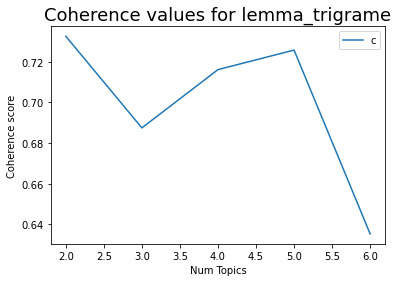

... Running lda with 2 topics
=== LDA model with 2 topics took : 1.2 minutes
Topic: 0 -> Words: 0.049*"retrouvez_toutes_information" + 0.049*"information_mieux_comprendre" + 0.049*"mieux_comprendre_enjeu" + 0.049*"toutes_information_mieux" + 0.049*"comprendre_enjeu_crise" + 0.049*"enjeu_crise_notredefense" + 0.047*"point_situation_retrouvez" + 0.047*"situation_retrouvez_toutes" + 0.047*"armee_lair_marinenationale" + 0.047*"armeedeterre_armee_lair"
Topic: 1 -> Words: 0.100*"frederic_leclerc_imhoff" + 0.052*"carte_situation_militaire" + 0.052*"situation_militaire_juin" + 0.047*"militaire_juin_soir" + 0.047*"juin_soir_donbass" + 0.033*"adhesion_union_europeenne" + 0.031*"von_der_leyen" + 0.028*"crime_contre_humanite" + 0.026*"ursula_von_der" + 0.025*"cet_apres_midi"
=== Coherence Score: 0.73
... Running lda visualization
... Running dominant topics
Format topics took 2e+01 minutes
... Graph topics and keywords


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... Graph word cloud for each topic

 Total running time: 28.2273441473643 minutes


index  \
tweet_id                     
1488433061196812291      0   
1488447673883676672      1   
1488493240475078658      2   
1488502446771081216      3   
1488511509961527302      4   
...                    ...   
1542967067611127813  19738   
1542963887175335937  19739   
1542971236459888641  19740   
1542969041161158656  19741   
1542981780092985344  19742   

                                                                                                                                                                                                                                                                                                                                        text  \
tweet_id                                                                                                                                                                                                                                                                                                                                       
1488433061196812291                                                                                                                               voilà l'info, malheureusement très peu reprise par les #medias: \r\n2e entretien téléphonique en 4 jours entre #emmanuelmacron et #vladimirpoutine sur l'#ukraine. https://t.co/yyxetpnxuc   
1488447673883676672                                                                                                                                                                                                                                               #ukraine face à poutine ... macron hausse le ton ! https://t.co/mfpsevidlv   
1488493240475078658                                                                          crise en #ukraine : « emmanuel #macron et vladimir #poutine, se sont reparlés hier soir. il y a un dialogue et des échanges nourris. on veut éviter un conflit armé à nos portes. c'est encore possible » @gabrielattal https://t.co/v7ovwb9n4i   
1488502446771081216                           la #russie c'est l'équivalent du pib de l'italie. attention aux sanctions qu'elle pourrait recevoir et monsieur poutine est réaliste. on a loupé la relation avec la russie il y a une quinzaine d'années : elle devra être reconstruite dans l'avenir. #kiev #ukraine https://t.co/b15g66ehvl   
1488511509961527302                                                                                                                                                      crise en #ukraine : voilà pourquoi il faut sortir du piège atlantiste, refuser la guerre et quitter l’otan sur le champ ! nouvelle vidéo ➡️ https://t.co/qjyacvg9pk   
...                                                                                                                                                                                                                                                                                                                                      ...   
1542967067611127813                                                                                                                                                                                                                                    c'est magnifique et tellement émouvant 🥰🇺🇦🇪🇺 #ukraine #europe https://t.co/0ywt0zwqot   
1542963887175335937  👉 guerre un #ukraine : que faire pour aider les populations ?\r\n\r\n🗣️ @vpecresse \r\n"il y a urgence : l'hiver qui arrive. il faut mettre à l'abri les populations, reconstruire avant l'hiver [...] il faut investir massivement dans les régions libérées."\r\n\r\n📺 #le20hdedariusrochebin https://t.co/rh8jkshhcs   
1542971236459888641          👉 guerre en #ukraine : le soft power des réseaux sociaux\r\n\r\n🗣️ @vpecresse\r\n\r\n"on peut organiser le chaos à partir de ce soft power des réseaux sociaux [...] on le voit d'ailleurs car nos extrémistes sont plutôt pro russes."\r\n\r\n📺 

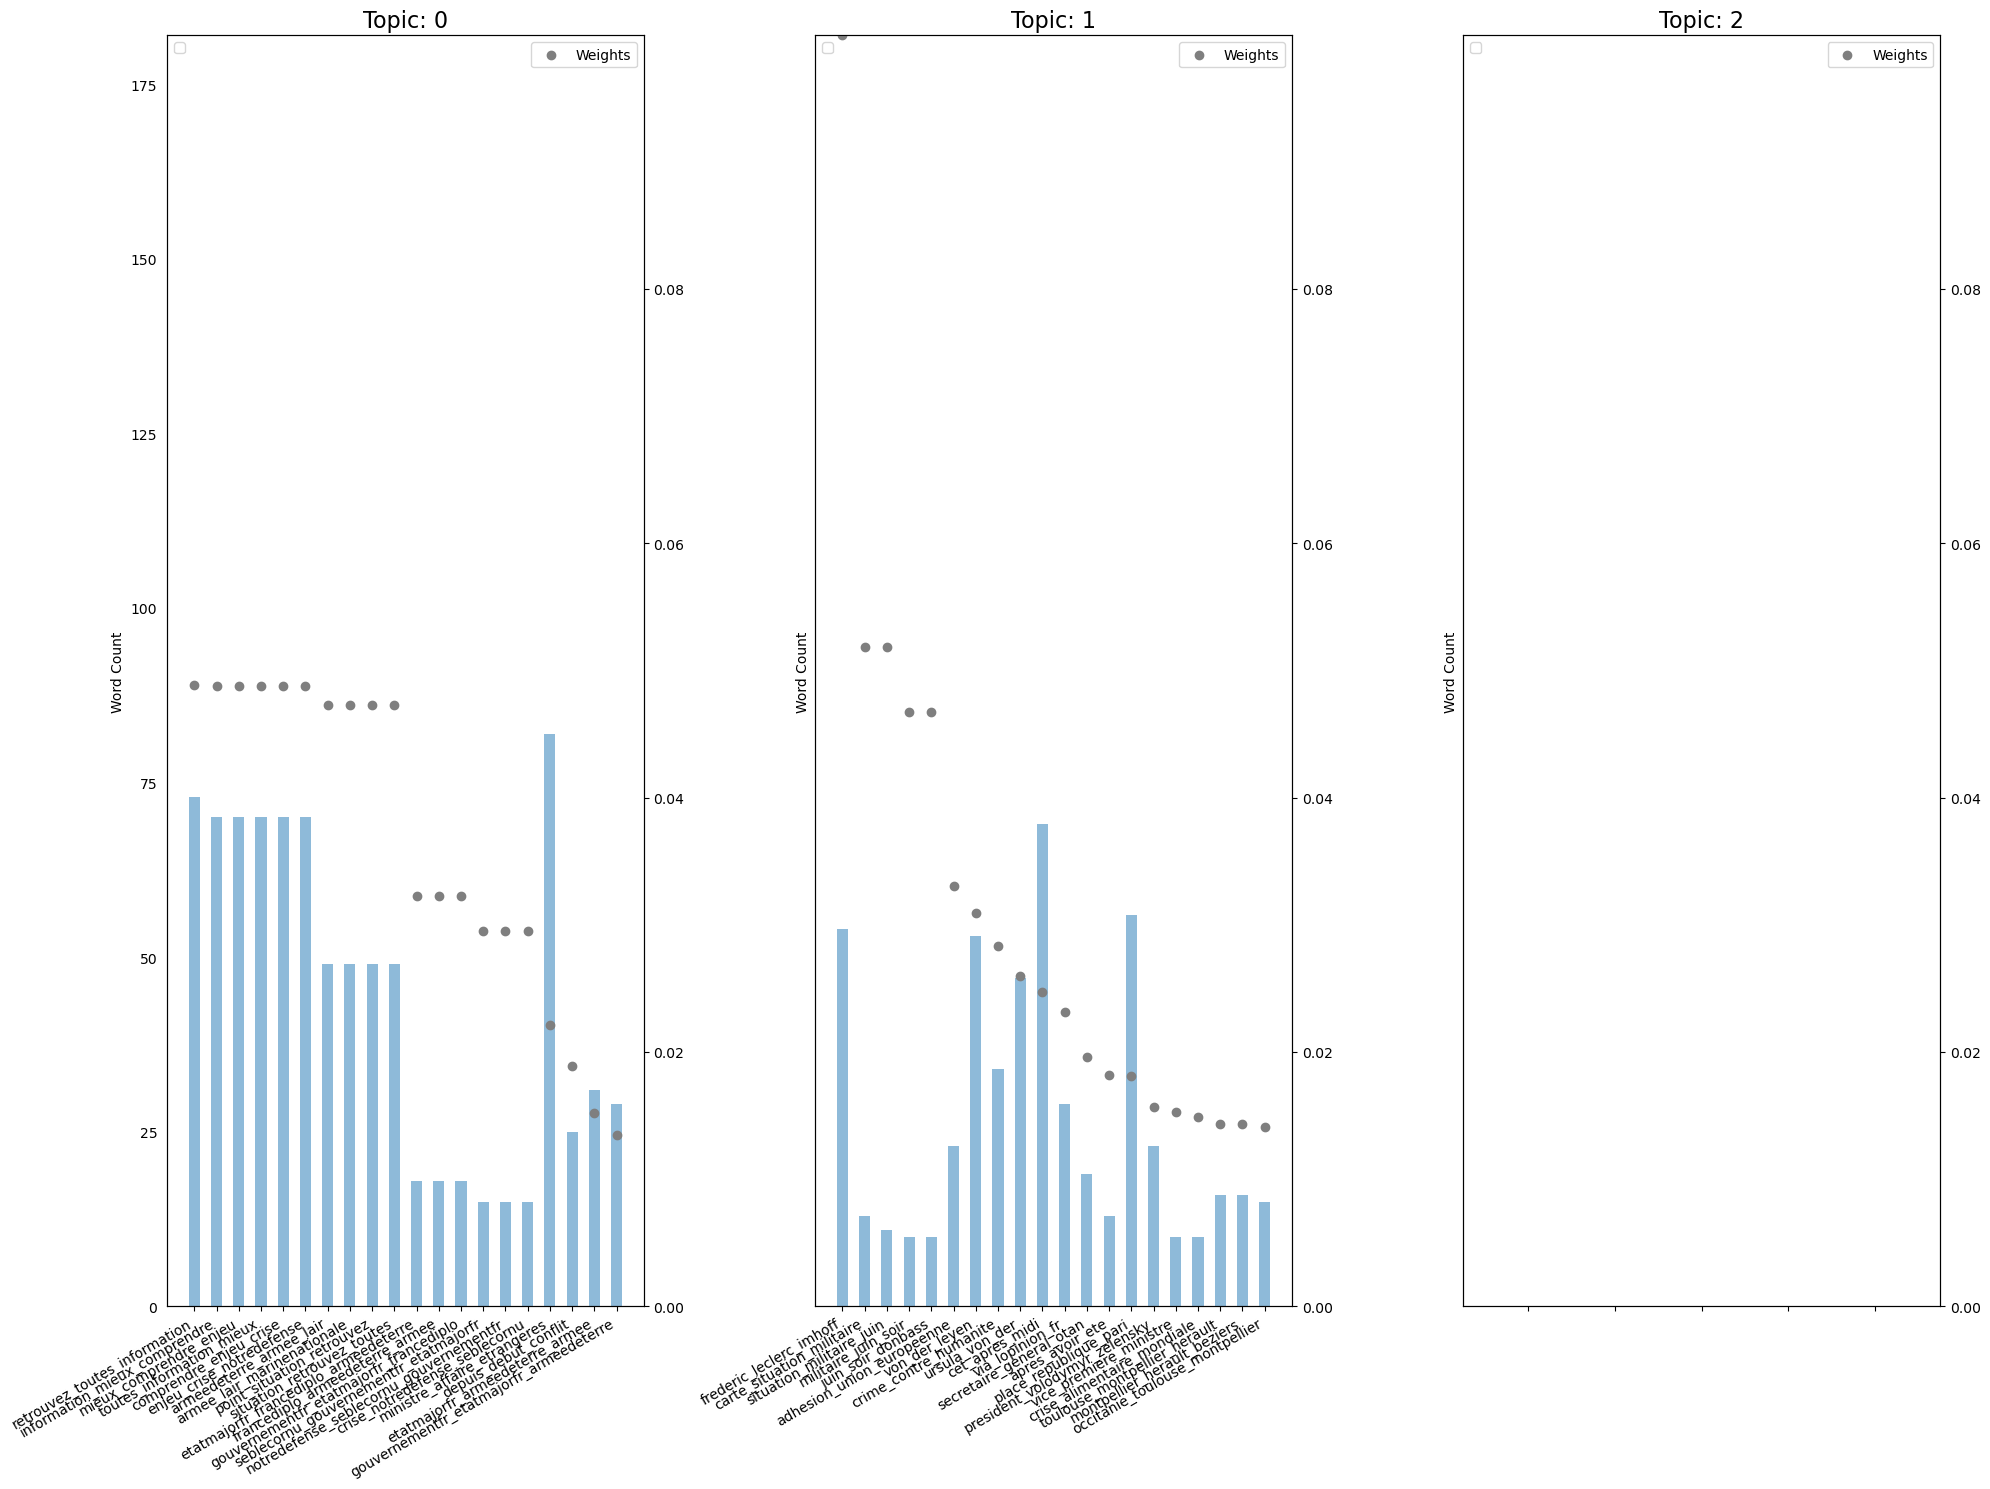

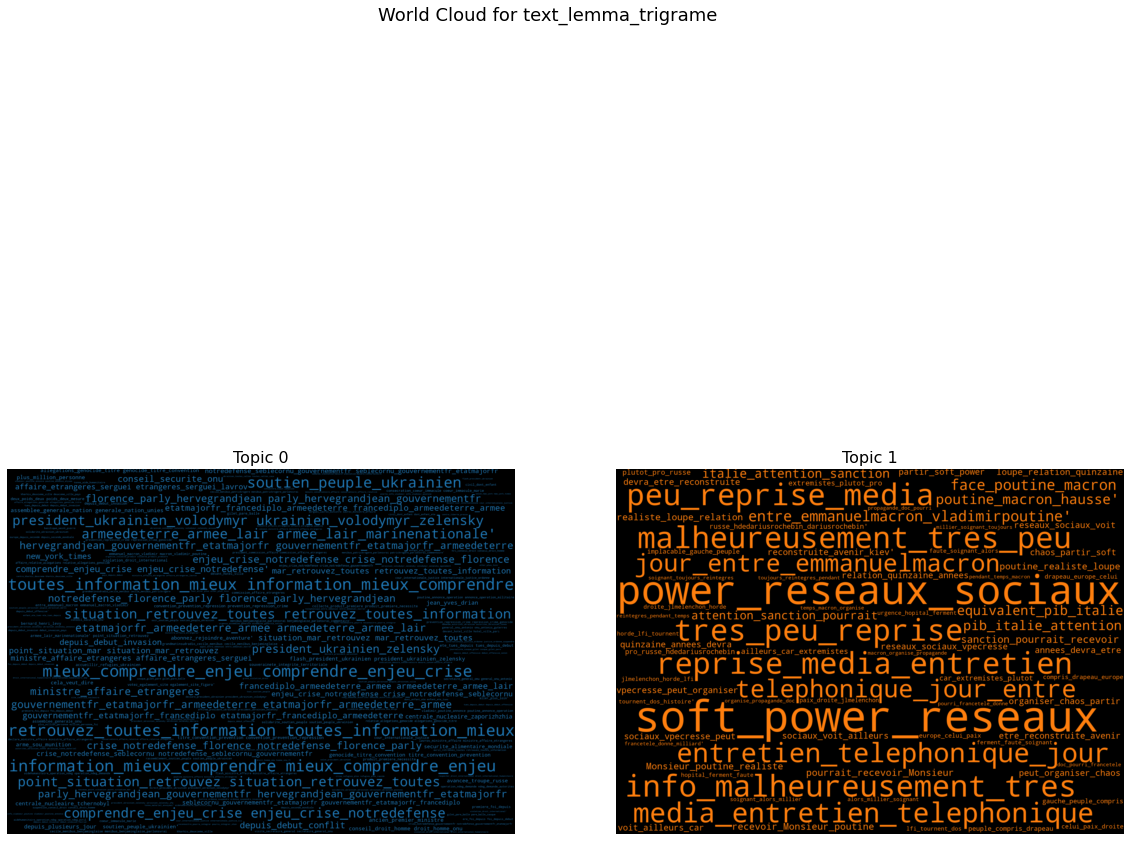

In [24]:
run_all(data.copy(deep=True), "text_lemma_trigrame", "lemma_trigrame", True)

## Stem 

===== Method : stem =====
... Running bag of words
... Running search for best nb of topics
=== LDA model with 2 topics took : 2.6 minutes
Topic: 0 -> Words: 0.026*"ukrainien" + 0.022*"arme" + 0.015*"russ" + 0.015*"ete" + 0.012*"kiev" + 0.010*"direct" + 0.009*"civil" + 0.008*"depuis" + 0.008*"mort" + 0.008*"donbass"
Topic: 1 -> Words: 0.015*"franc" + 0.011*"macron" + 0.011*"poutin" + 0.008*"plus" + 0.008*"tout" + 0.008*"contr" + 0.008*"europ" + 0.008*"europeen" + 0.007*"ue" + 0.006*"fait"
=== Coherence Score: 0.32
=== LDA model with 3 topics took : 2.3 minutes
Topic: 0 -> Words: 0.025*"arme" + 0.016*"russ" + 0.016*"ete" + 0.014*"ukrainien" + 0.013*"kiev" + 0.012*"depuis" + 0.010*"apre" + 0.010*"jour" + 0.010*"direct" + 0.009*"civil"
Topic: 1 -> Words: 0.018*"ukrainien" + 0.016*"franc" + 0.016*"europeen" + 0.014*"zelensky" + 0.013*"president" + 0.011*"europ" + 0.011*"soutien" + 0.010*"tout" + 0.009*"emmanuelmacron" + 0.009*"situat"
Topic: 2 -> Words: 0.020*"macron" + 0.020*"poutin" + 0.

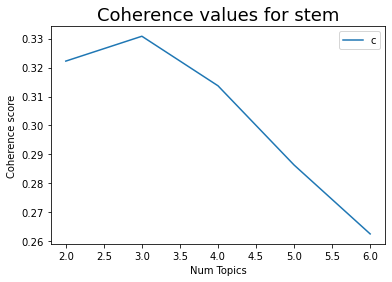

... Running lda with 3 topics
=== LDA model with 3 topics took : 2.4 minutes
Topic: 0 -> Words: 0.025*"arme" + 0.016*"russ" + 0.016*"ete" + 0.014*"ukrainien" + 0.013*"kiev" + 0.012*"depuis" + 0.010*"apre" + 0.010*"jour" + 0.010*"direct" + 0.009*"civil"
Topic: 1 -> Words: 0.018*"ukrainien" + 0.016*"franc" + 0.016*"europeen" + 0.014*"zelensky" + 0.013*"president" + 0.011*"europ" + 0.011*"soutien" + 0.010*"tout" + 0.009*"emmanuelmacron" + 0.009*"situat"
Topic: 2 -> Words: 0.020*"macron" + 0.020*"poutin" + 0.014*"franc" + 0.013*"plus" + 0.012*"fait" + 0.010*"otan" + 0.010*"comm" + 0.009*"contr" + 0.009*"faut" + 0.008*"etre"
=== Coherence Score: 0.33
... Running lda visualization
... Running dominant topics
Format topics took 2e+01 minutes
... Graph topics and keywords


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... Graph word cloud for each topic

 Total running time: 35.95496175686518 minutes


index  \
tweet_id                     
1488433061196812291      0   
1488447673883676672      1   
1488493240475078658      2   
1488502446771081216      3   
1488511509961527302      4   
...                    ...   
1542967067611127813  19738   
1542963887175335937  19739   
1542971236459888641  19740   
1542969041161158656  19741   
1542981780092985344  19742   

                                                                                                                                                                                                                                                                                                                                        text  \
tweet_id                                                                                                                                                                                                                                                                                                                                       
1488433061196812291                                                                                                                               voilà l'info, malheureusement très peu reprise par les #medias: \r\n2e entretien téléphonique en 4 jours entre #emmanuelmacron et #vladimirpoutine sur l'#ukraine. https://t.co/yyxetpnxuc   
1488447673883676672                                                                                                                                                                                                                                               #ukraine face à poutine ... macron hausse le ton ! https://t.co/mfpsevidlv   
1488493240475078658                                                                          crise en #ukraine : « emmanuel #macron et vladimir #poutine, se sont reparlés hier soir. il y a un dialogue et des échanges nourris. on veut éviter un conflit armé à nos portes. c'est encore possible » @gabrielattal https://t.co/v7ovwb9n4i   
1488502446771081216                           la #russie c'est l'équivalent du pib de l'italie. attention aux sanctions qu'elle pourrait recevoir et monsieur poutine est réaliste. on a loupé la relation avec la russie il y a une quinzaine d'années : elle devra être reconstruite dans l'avenir. #kiev #ukraine https://t.co/b15g66ehvl   
1488511509961527302                                                                                                                                                      crise en #ukraine : voilà pourquoi il faut sortir du piège atlantiste, refuser la guerre et quitter l’otan sur le champ ! nouvelle vidéo ➡️ https://t.co/qjyacvg9pk   
...                                                                                                                                                                                                                                                                                                                                      ...   
1542967067611127813                                                                                                                                                                                                                                    c'est magnifique et tellement émouvant 🥰🇺🇦🇪🇺 #ukraine #europe https://t.co/0ywt0zwqot   
1542963887175335937  👉 guerre un #ukraine : que faire pour aider les populations ?\r\n\r\n🗣️ @vpecresse \r\n"il y a urgence : l'hiver qui arrive. il faut mettre à l'abri les populations, reconstruire avant l'hiver [...] il faut investir massivement dans les régions libérées."\r\n\r\n📺 #le20hdedariusrochebin https://t.co/rh8jkshhcs   
1542971236459888641          👉 guerre en #ukraine : le soft power des réseaux sociaux\r\n\r\n🗣️ @vpecresse\r\n\r\n"on peut organiser le chaos à partir de ce soft power des réseaux sociaux [...] on le voit d'ailleurs car nos extrémistes sont plutôt pro russes."\r\n\r\n📺 

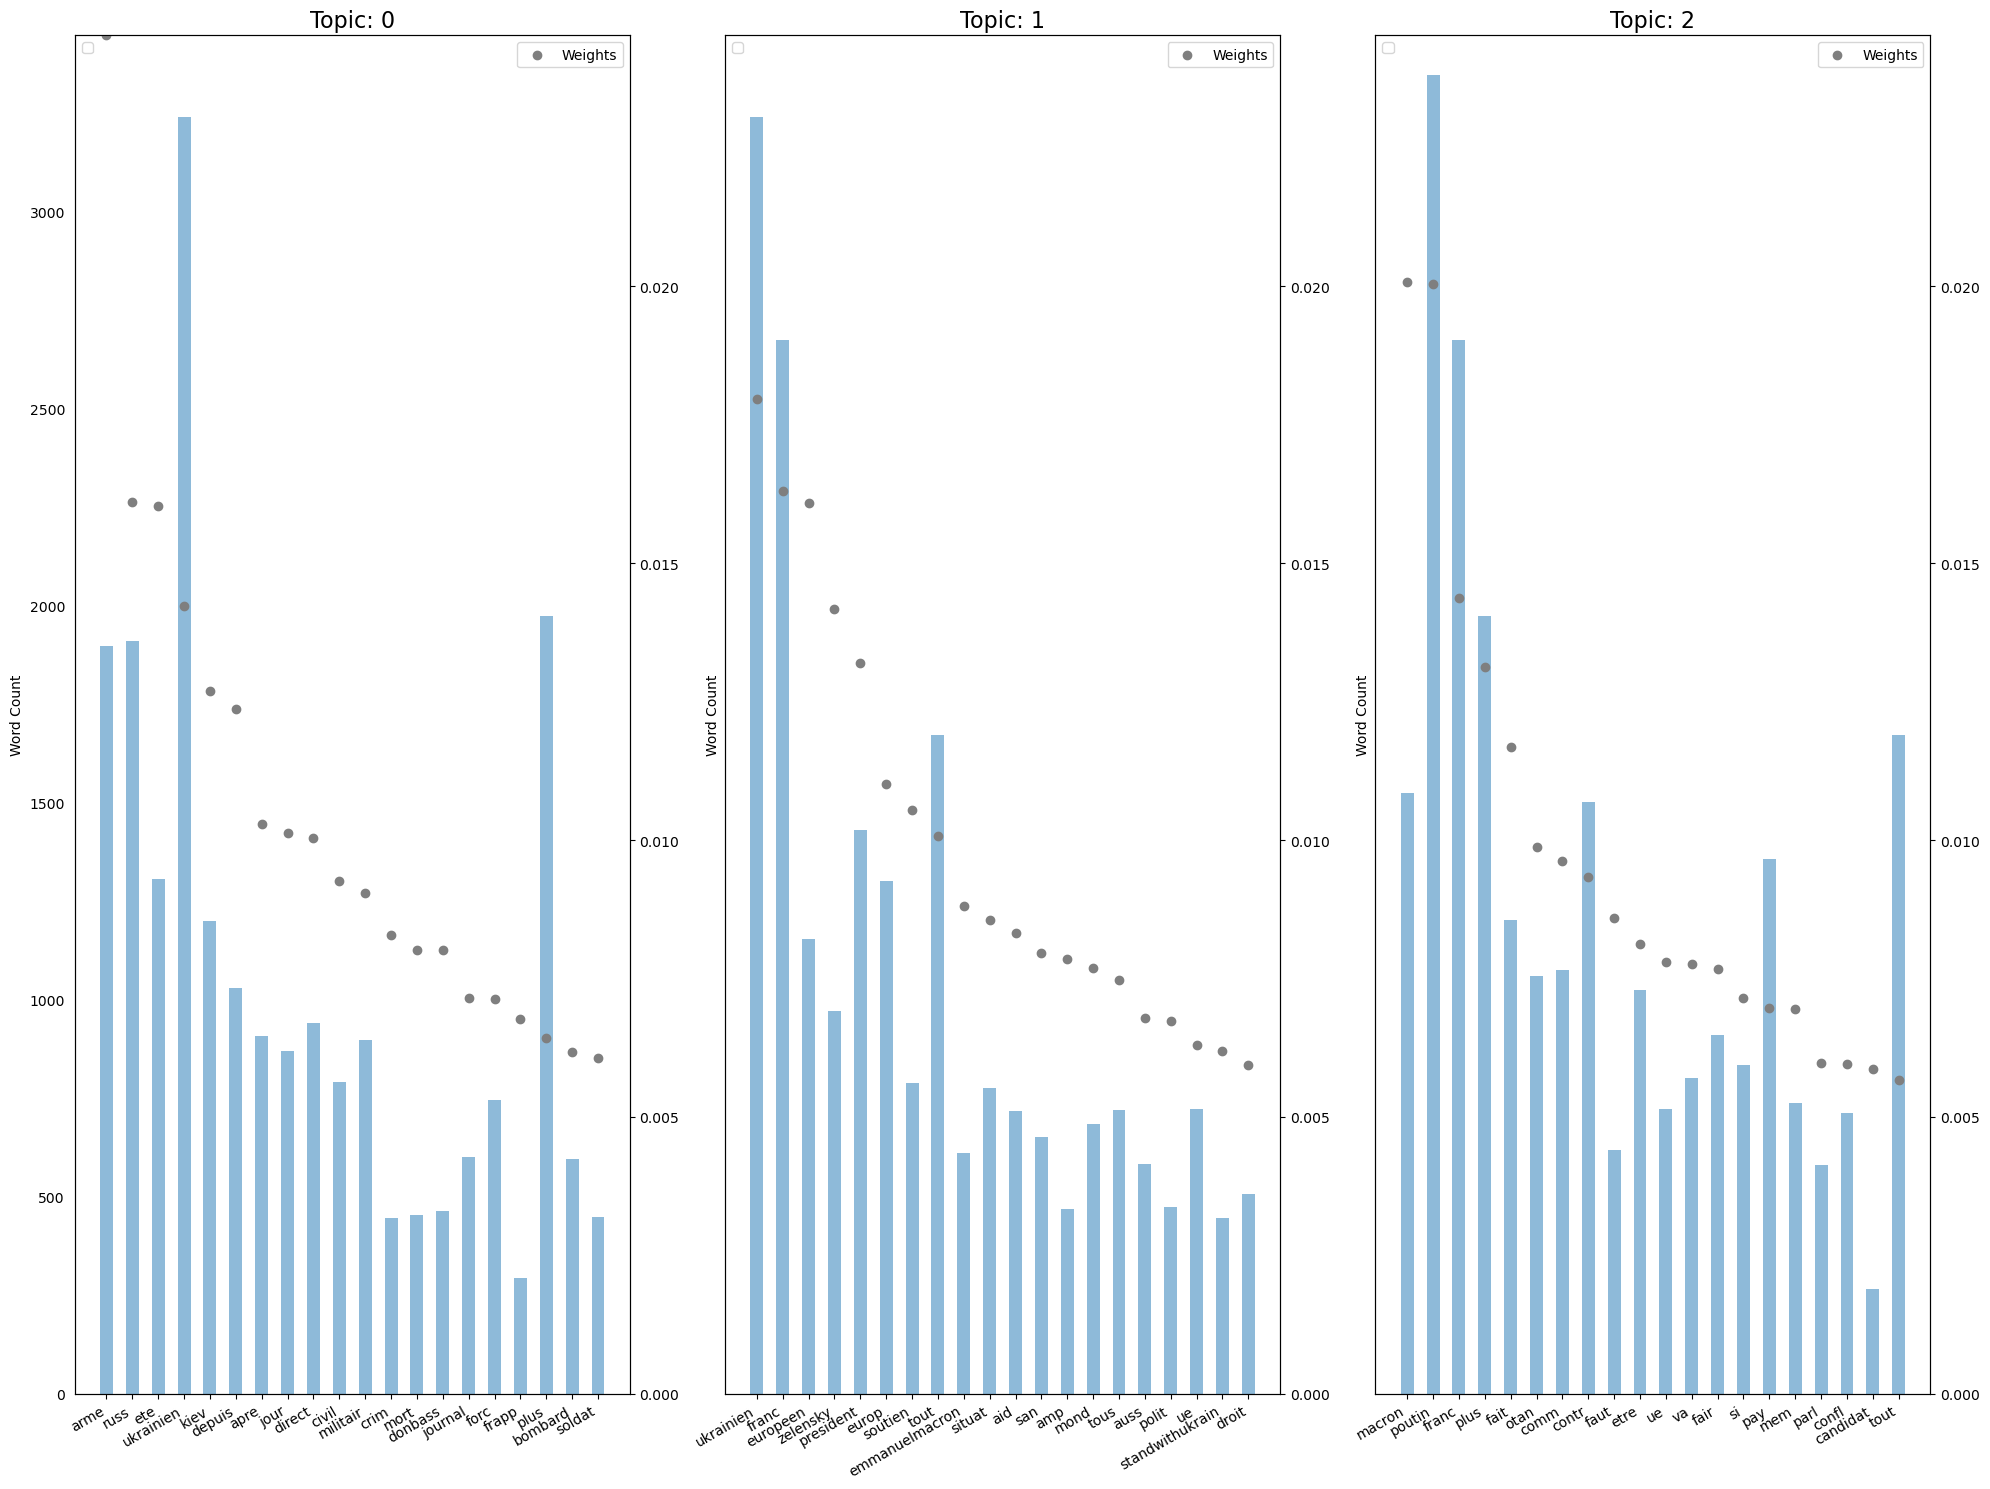

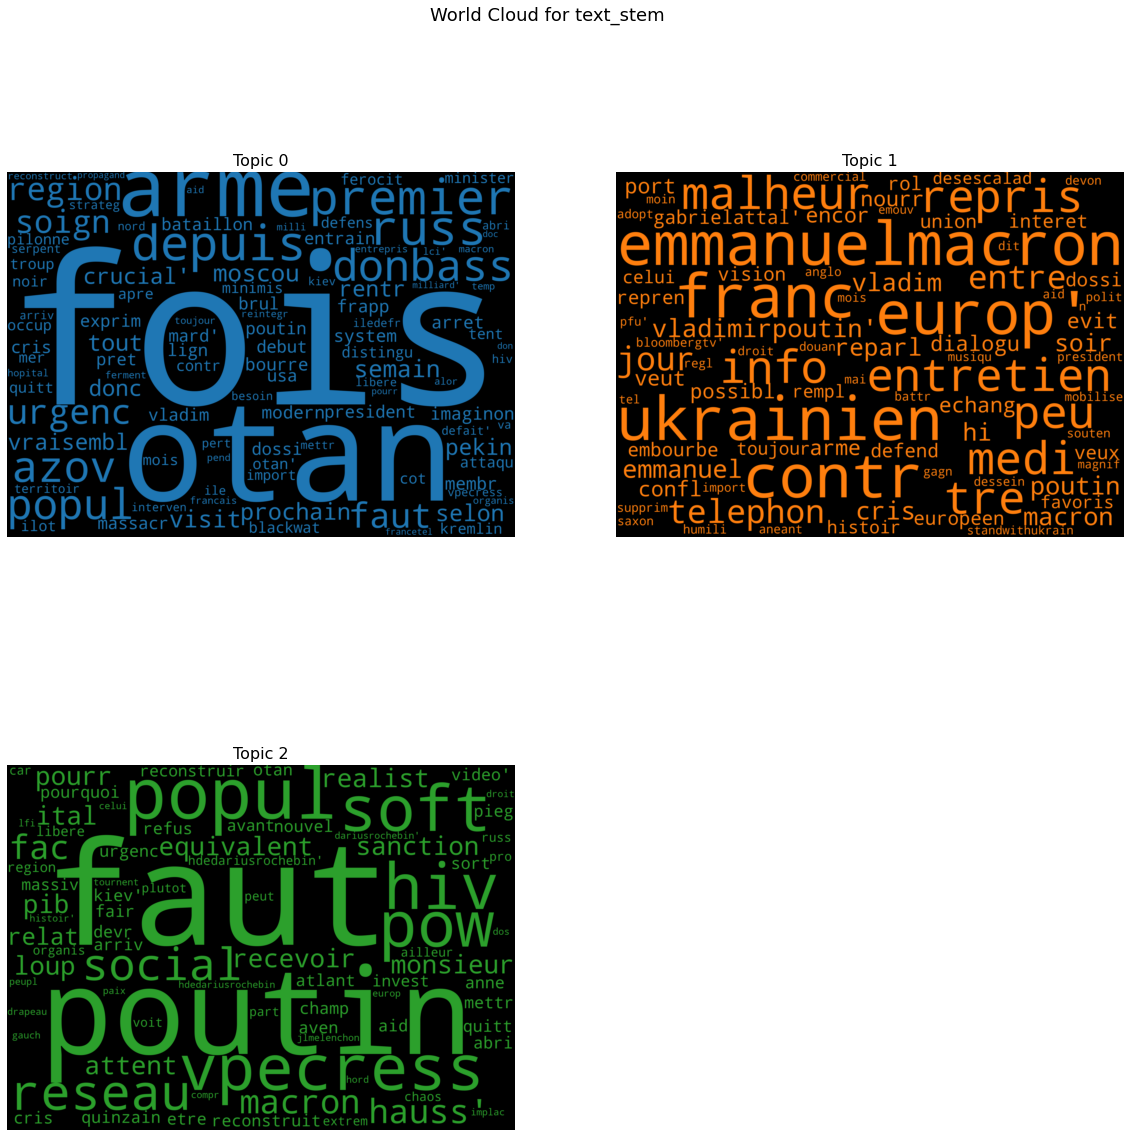

In [25]:
run_all(data.copy(deep=True), "text_stem", "stem", True)

In [ ]:
def read_outputs(alias, best_topics):
    import matplotlib.image as mpimg
    # read an image
    #nb_topics = mpimg.imread(f"output/img/search_nbtopics_{alias}.png")
    bp = mpimg.imread(f"output/img/{alias}.png")
    wc = mpimg.imread(f"output/img/world_cloud_{alias}.png")
 
    # Output Images
    #bp.imshow(nb_topics)
    #plt.imshow(bp)
    #plt.imshow(wc)

    df_dominant_topics = pd.read_csv(f"output/dominant_topics_{alias}_{best_topics}topics.csv",
                              sep=";")
    return(df_dominant_topics)


In [ ]:
read_outputs(alias="stem_bigrame", best_topics=3)

In [ ]:
data.reset_index()["text_stem_trigrame"][:10]

In [ ]:
data["text_stem_trigrame"].dtypes

In [ ]:
df_trigrame = pd.read_csv("~/PycharmProjects/twitter_text_mining/output/dominant_topics_stem_trigrame_5topics.csv", sep=";")
df_trigrame.head()

In [ ]:
df_trigrame["dominant_topic"]

In [ ]:
# filtrer les chaines d'info ==> exclure 
print("... Deleting stop words")
list_stop_words = ["inform_mieux_comprendr", "situat_retrouv_tout", "tout_inform_mieux",
                  "retrouv_tout_inform", "point_situat_retrouv", "mieux_comprendr_enjeux",
                  "arme_lair_marinenational", "enjeux_cris_notredefens", "comprendr_enjeux_cris"]
data = data[data["text_stem_trigrame"].notnull()]
data["text_stem_trigrame"] = data["text_stem_trigrame"].apply(
    lambda x: ' '.join([word for word in x.split(" ") if word not in (
        list_stop_words)])
        )


df_trigrame = run_all(data.copy(deep=True), "text_stem_trigrame", "stem_trigrame", False, 3)

In [ ]:
df_trigrame

In [ ]:
run_all(data.copy(deep=True), "text_stem_bigrame", "stem_bigrame", False, nb_topics=3)

In [ ]:
df_dominant_stem[df_dominant_stem["dominant_topic"]==0]["text_stem"].values

In [ ]:
df_dominant_topics_lemma = format_topics_sentences(ldamodel=lda_lemma, corpus=doc_term_matrix_lemma, texts=text_tokens_lemma)
df_dominant_topics_stem = format_topics_sentences(ldamodel=lda_stem, corpus=doc_term_matrix_stem, texts=text_tokens_stem)
df_dominant_topics_bigrame = format_topics_sentences(ldamodel=lda_bigram, corpus=doc_term_matrix_bigram, texts=text_tokens_bigram)
df_dominant_topics_trigram = format_topics_sentences(ldamodel=lda_trigram, corpus=doc_term_matrix_trigram, texts=text_tokens_trigram)
df_dominant_topics_stem_bigrame = format_topics_sentences(ldamodel=lda_stem_bigram, corpus=doc_term_matrix_stem_bigram, texts=text_tokens_stem_bigram)
df_dominant_topics_stem_trigram = format_topics_sentences(ldamodel=lda_stem_trigram, corpus=doc_term_matrix_stem_trigram, texts=text_tokens_stem_trigram)

In [ ]:
 # todo: FIXME add this information some where in a function
original_cols = ["text_lemma", "text_lemma_bigrame",
    "text_stem_trigrame", "text_stem",
    "text_stem_bigrame", "text_lemma_trigrame",
    "text_lemma", "text_stem_trigrame", 
    "text_stem"]

In [ ]:
sent_topics_sorteddf_mallet.shape

In [ ]:
df_dominant_topics.head()

In [ ]:
fig = px.bar(df_dominant_topics, x=' 	Dominant_Topic', y='pop')

### La sentence la plus représentative de chaque topic

In [ ]:
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_dominant_topics.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative_Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
from plotly.subplots import make_subplots

nb_topics = df["topic_id"].unique()
fig = make_subplots(rows=len(nb_topics), cols=1, start_cell="bottom-left",
                   subplot_titles= ("topic 1", "topic 2", "topic 3", "topic 4", "topic 5"))
for i in nb_topics:
    print(i)
    fig.add_trace(go.Bar(x=df[df['topic_id']==i]["word"], y=df[df['topic_id']==i]['word_count']),
                        row=i+1, col=1)
    fig.update_layout(barmode='stack',
                      xaxis={'categoryorder': 'total descending'})
fig.show()


fig = make_subplots(rows=len(nb_topics), cols=1, start_cell="bottom-left",
                   subplot_titles= ("topic 1", "topic 2", "topic 3", "topic 4", "topic 5"))
for i in nb_topics:
    print(i)
    sizeref = df[df['topic_id']==i]["importance"].max() / 100 ** 2

    fig.add_trace(go.Scatter(x=df[df['topic_id']==i]["importance"],
                             y=df[df['topic_id']==i]['word_count'],
                             text=df[df['topic_id']==i]["word"],
                             marker_size=df[df['topic_id']==i]["importance"]),
                        row=i+1, col=1)
    fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              line_width=2))
fig.show()

# fig = px.scatter(df[df['topic_id']==0], x="importance", y='word_count', color='word', size='importance' )
# fig.show()

In [ ]:
topics = lda_lemma.show_topics(formatted=False)
data_flat = [word for word_list in text_tokens_lemma for word in word_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])
        
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 

In [ ]:
### Word count and importance of key terms into the "optimal" topics

In [ ]:

make_cloud(data, df_dominant_topics_lemma, "lemma")
make_cloud(data, df_dominant_topics_bigrame, "lemma_bigrame")
make_cloud(data, df_dominant_topics_stem, "stem")

In [ ]:
all_files = [df_dominant_topics_lemma, df_dominant_topics_stem, df_dominant_topics_bigrame,
            df_dominant_topics_trigram,  df_dominant_topics_stem_bigrame, df_dominant_topics_stem_trigram]
for i,file in enumerate(all_files):
    file.to_csv(f"output/{i}.csv", sep=";")

In [ ]:
files = os.listdir(path + "/output/")
files_tw = []
for filename in files:
    try:
        tmp = re.search(r"dominant_.*\.csv\b", filename)[0]
        files_tw.append(tmp)
    except TypeError:
        pass

print(files_tw)



In [ ]:
df_dominant_topics_lemma.head()

In [ ]:
# Assign a topic to each tweet 
def format_topics_sentences(ldamodel, corpus, texts):
        
        # Init output
        sent_topics_df = pd.DataFrame()

        start = time.time()
        # Get main topic in each document
        for i, row_list in enumerate(ldamodel[corpus]):
            # per_word_topics: list of topics, sorted in descending order of most likely topics for each word
            row = row_list[0] if ldamodel.per_word_topics else row_list
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            # Get the Dominant topic, Perc Contribution and Keywords for each document
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:  # => dominant topic
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                else:
                    break
        end = time.time()
        delta = (end - start)/60
        print(f"Took {delta:.2} minutes")
        sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
        
        # Add original text to the end of the output
        contents = pd.Series(texts)
        sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

        # format
        sent_topics_df = sent_topics_df.reset_index()
        sent_topics_df.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
        return(sent_topics_df)

def make_cloud(df, df_dominant_topic, vect_type):
    df[f"Dominant_Topic_{vect_type}"] = df_dominant_topic["Dominant_Topic"]
    color_list = ["summer", "winter", "Oranges", "seismic"]
    
    for i in df_dominant_topic["Dominant_Topic"].unique():
        color = random.choice(color_list)
        cloud = WordCloud(colormap=color, width=800, height=400).generate(str(
            df[df[f"Dominant_Topic_{vect_type}"]==i][f"text_{vect_type}"]))
        fig = plt.figure(figsize=(12,10))
        plt.axis("off")
        plt.imshow(cloud,interpolation='bilinear')
        plt.title(f"WordCloud for Topic {i}", size = 24)
        plt.show()

        cloud.to_file(f"output/img/{vect_type}_topic{i}.png")

# Assign a topic to each tweet 

In [ ]:
# trigrames stem
text_tokens_stem_trigram, dico_words_stem_trigram, doc_term_matrix_stem_trigram = compute_bag_of_words(data["text_stem_trigrame"])

best_topics_stem_trigram = search_nb_topics(dictionary=dico_words_stem_trigram,
                                                        corpus=doc_term_matrix_stem_trigram,
                                                        texts=text_tokens_stem_trigram,
                                                        start=2, limit=5, step=1)

lda_stem_trigram, score_stem_trigram = compute_lda(dictionary=dico_words_stem_trigram, corpus=doc_term_matrix_stem_trigram, texts=text_tokens_stem_trigram, num_topics=best_topics_stem_trigram)

vis = gensimvis.prepare(topic_model=lda_stem_trigram, corpus=doc_term_matrix_stem_trigram, dictionary=dico_words_stem_trigram)
pyLDAvis.enable_notebook()
#pyLDAvis.display(vis)
pyLDAvis.save_html(vis, 'lda_stem_trigram.html')

In [ ]:
# trigrames
text_tokens_trigram, dico_words_trigram, doc_term_matrix_trigram = compute_bag_of_words(data["text_lemma_trigrame"])

best_topics_trigram = search_nb_topics(dictionary=dico_words_trigram,
                                                        corpus=doc_term_matrix_trigram,
                                                        texts=text_tokens_trigram,
                                                        start=2, limit=10, step=1)

lda_trigram, score_trigram = compute_lda(dictionary=dico_words_trigram, corpus=doc_term_matrix_trigram, texts=text_tokens_trigram, num_topics=best_topics_trigram)

vis = gensimvis.prepare(topic_model=lda_trigram, corpus=doc_term_matrix_trigram, dictionary=dico_words_trigram)
pyLDAvis.enable_notebook()
#pyLDAvis.display(vis)
pyLDAvis.save_html(vis, 'lda_trigram.html')

In [ ]:
# bigramms with stemmatization
text_tokens_stem_bigram, dico_words_stem_bigram, doc_term_matrix_stem_bigram = compute_bag_of_words(data["text_stem_bigrame"])

#best_topics_stem_bigram = search_nb_topics(dictionary=dico_words_stem_bigram,
#                                                        corpus=doc_term_matrix_stem_bigram,
#                                                        texts=text_tokens_stem_bigram,
#                                                        start=2, limit=10, step=1)

lda_stem_bigram, score_stem_bigram = compute_lda(dictionary=dico_words_stem_bigram, corpus=doc_term_matrix_stem_bigram, texts=text_tokens_stem_bigram, num_topics=3)

vis = gensimvis.prepare(topic_model=lda_stem_bigram, corpus=doc_term_matrix_stem_bigram, dictionary=dico_words_stem_bigram)
pyLDAvis.enable_notebook()
#pyLDAvis.display(vis)
pyLDAvis.save_html(vis, 'lda_stem_bigram.html')

In [ ]:
# bigrammes
text_tokens_bigram, dico_words_bigram, doc_term_matrix_bigram = compute_bag_of_words(data["text_lemma_bigrame"])

#best_topics_bigram = search_nb_topics(dictionary=dico_words_bigram,
#                                                        corpus=doc_term_matrix_bigram,
#                                                        texts=text_tokens_bigram,
#                                                        start=2, limit=10, step=1)

lda_bigram, score_bigram = compute_lda(dictionary=dico_words_bigram, corpus=doc_term_matrix_bigram, texts=text_tokens_bigram, num_topics=5)

vis = gensimvis.prepare(topic_model=lda_bigram, corpus=doc_term_matrix_bigram, dictionary=dico_words_bigram)
pyLDAvis.enable_notebook()
#pyLDAvis.display(vis)
pyLDAvis.save_html(vis, 'lda_bigram.html')

In [ ]:
# stem
text_tokens_stem, dico_words_stem, doc_term_matrix_stem = compute_bag_of_words(data["text_stem"])
best_topics_stem = search_nb_topics(dictionary=dico_words_stem,
                                    corpus=doc_term_matrix_stem,
                                    texts=text_tokens_stem,
                                    start=2, limit=7, step=1)

lda_stem, score_stem = compute_lda(dictionary=dico_words_stem, corpus=doc_term_matrix_stem, texts=text_tokens_stem, num_topics=best_topics_stem)


vis = gensimvis.prepare(topic_model=lda_stem, corpus=doc_term_matrix_stem, dictionary=dico_words_stem)
pyLDAvis.enable_notebook()
#pyLDAvis.display(vis)
pyLDAvis.save_html(vis, 'lda_stem.html')

In [ ]:
#text_tokens_lemma, dico_words_lemma, doc_term_matrix_lemma = compute_bag_of_words(data["text_lemma"])
#best_topics_lemma = search_nb_topics(dictionary=dico_words_lemma,
#                                    corpus=doc_term_matrix_lemma,
#                                    texts=text_tokens_lemma,
#                                    start=2, limit=7, step=1)


lda_lemma, score_lemma = compute_lda(dictionary=dico_words_lemma, corpus=doc_term_matrix_lemma, texts=text_tokens_lemma, num_topics=3)


vis = gensimvis.prepare(topic_model=lda_lemma, corpus=doc_term_matrix_lemma, dictionary=dico_words_lemma)
pyLDAvis.enable_notebook()
#pyLDAvis.display(vis)
pyLDAvis.save_html(vis, 'lda_lemma.html')

In [ ]:
data.iloc[11591]

In [ ]:
print(data["text"].iloc[11591])
print(data["text"].iloc[425])

In [ ]:
raw_data = read_files(os.path.join(path, "data/test/"))

In [ ]:


representative_sentence(test, data)

In [ ]:
test = zip (original_cols, files_tw)
for origin_col, file in test:
    _dominant = pd.read_csv(path + "/output/" + file, sep=";")
    _dominant = _dominant.drop("Unnamed: 0", axis=1)
    print(f"==== {file}")
    rep = representative_sentence(_dominant, data, origin_col)

In [ ]:
data.columns

In [ ]:
test = pd.read_csv("output/dominant_topics_lemma.csv", sep=";")
test.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df_dominant_lemma_bigram[df_dominant_lemma_bigram["dominant_topic"]==1].sort_values(by=["dominant_topic", "topic_perc_contrib"], ascending=[True, False]).head(20)

In [ ]:
run_all(data["text_lemma"], "lemmatization", True)
run_all(data["text_lemma"], "lemmatization", False, 4)
run_all(data["text_stem"], "stemming", True)
run_all(data["text_lemma_bigrame"], "bigramLemmatization", True)
run_all(data["text_lemma_bigrame"], "bigramLemmatization", False, 3)
run_all(data["text_stem_bigrame"], "bigramStemming",  False, 4)
run_all(data["text_lemma_trigrame"], "trigramLemmatization", True)
run_all(data["text_stem_trigrame"], "trigramStemming", True)
run_all(data["text_stem_trigrame"], "trigramStemming", False, 3)



In [ ]:
def representative_sentence(df_topic, df_, col_):
    df_ = df_[df_[col_].notna()]
    print(df_.shape)
    sort_rep_topic = df_topic.sort_values(
        by=["Dominant_Topic", "Topic_Perc_Contrib"],
        ascending=[True,False])
    sort_rep_topic = sort_rep_topic.drop_duplicates(["Dominant_Topic"])
    
    # Format
    sort_rep_topic.columns = ["tweet_no", "dominant_topic",
                              "topic_perc_contrib",
                              "keywords", "representative_text"]
   
    for i, row in sort_rep_topic.iterrows():
        print(f"\n\nTopic number: {row['dominant_topic']}")
        print(row["representative_text"])
        print(" ===== Original tweet :")
        print(f"Author: {df_['username'].iloc[row['tweet_no']]}:")
        print(df_['text'].iloc[row['tweet_no']])
    
    return sort_rep_topic

In [ ]:
df_dominant_lemma_bigram = run_all(data.copy(deep=True), "text_lemma_bigrame", "lemmatization_bigram", False, 3)

In [ ]:
df_dominant_lemma[df_dominant_lemma["dominant_topic"]==0].sort_values(by=["dominant_topic", "topic_perc_contrib"], ascending=[True, False]).head(20)

In [ ]:
df_dominant_lemma = run_all(data.copy(deep=True), "text_lemma", "lemmatization", False, 4)

In [ ]:
df_dominant_stem[df_dominant_stem["dominant_topic"]==2].sort_values(by=["dominant_topic", "topic_perc_contrib"], ascending=[True, False]).head(20)

In [ ]:
df_dominant_stem = run_all(data.copy(deep=True), "text_stem", "stemming", False, 4)

In [ ]:
df_dominant_stem_bigram = run_all(data.copy(deep=True), "text_stem_bigrame", "stemming_bigram", False, 4)

In [ ]:
df_dominant_stem_bigram.head()

In [ ]:
df_tweets = data.copy(deep=True)
df_tweets = df_tweets[["tweet_id", "text", "username", "text_lemma"]]
df_text = data["text_lemma"]
alias = "lemmatization"

In [ ]:
df_tweets.head()

In [ ]:
df_test.head()

In [ ]:
df_dominant_topics

In [ ]:
df_dominant_topics_.head()

In [ ]:
df_dominant_topics_ = df_tweets.join(df_dominant_topics, how="inner" )
df_dominant_topics_ = df_dominant_topics_.set_index("tweet_id")

In [ ]:
df_tweets = data.copy(deep=True)
df_tweets = df_tweets[["tweet_id", "text", "username", "text_lemma"]]
df_tweets = df_tweets.reset_index(drop=True)
df_text = data["text_lemma"]
alias = "lemmatization"

#df_test  = pd.concat([df_dominant_topics.reset_index(), df_tweets.reset_index()], ignore_index=True, axis=1, )